# Lead Score Case Study

## Problem Statement

X Education, an online course provider for professionals, seeks to improve lead conversion rates. They define leads as individuals who share their contact details or come through referrals and aim to convert them into customers through sales efforts, with a current conversion rate of 30%.

X Education has tasked me with developing a lead scoring model to prioritize leads based on their likelihood to convert, aiming to achieve an 80% conversion rate, as per the CEO's target.

## Business Goal

Develop a logistic regression model aimed at assigning lead scores ranging from 0 to 100 to potential leads. These scores will help the company in effectively targeting leads, with higher scores indicating a higher likelihood of conversion (hot leads), and lower scores indicating a lower probability of conversion.

## Step 1 : Import Libraries

In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SequentialFeatureSelector
import warnings
warnings.filterwarnings('ignore')

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Step 2 : Data Understanding

In [2]:
# Reading day csv
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### checking the shape, info and describe of the leads dataframe - leads_df

In [3]:
# checking for the shape of the dataframe
leads_df.shape

(9240, 37)

In [4]:
# checking for datatypes of columns
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 2.1 Data Quality Check

In [6]:
# Checking for empty rows and columns in the dataframe
print(leads_df.isnull().all(axis=1).sum())
print(leads_df.isnull().all(axis=0).sum())

0
0


There are no empty rows or columns in our dataframe

In [7]:
# Calculating null counts for all the columns in the dataframe
null_columns_leads_df = leads_df.columns[leads_df.isna().any()]
null_counts = leads_df[null_columns_leads_df].isna().sum()
print(null_counts)

Lead Source                                        36
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Lead Quality                                     4767
Lead Profile                                     2709
City                                             1420
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
dtype: int64


Seems like there are quite a few columns which are having null values in the dataframe.

In [8]:
# A function to calculate the null values percentage of a dataframe
def calculate_and_print_null_percentage(df):
    null_percentage = df.isna().mean() * 100
    null_percentage_sorted = null_percentage.sort_values(ascending=False)
    print(null_percentage_sorted)

In [9]:
# Calculating null value percentage for all the columns and making sure the above statement stands corrected.
calculate_and_print_null_percentage(leads_df)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

There are quite a few columns that has null values more than 40% in the dataframe

### 2.2 Check if any duplicate values are present

In [10]:
# A function to find duplicate values in the dataframe
def find_duplicate_rows(df):
    
    copy_df = df.duplicated()
    duplicate_rows = df[copy_df]

    return duplicate_rows

In [11]:
duplicate_rows = find_duplicate_rows(leads_df)

# Display the duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []


There are no duplicate values present in the dataframe

## Step 3 : Cleaning the data

### 3.1 Addressing the 'select' placeholder in categorical variables

It appears that these **'Select'** entries often indicate that customers haven't made a specific choice from the available options, essentially functioning as placeholders for missing information. Consequently, it would be appropriate to treat these **'Select'** values as equivalent to null or missing values, converting them accordingly.

In [12]:
# Converting 'Select' values to NaN.
leads_df = leads_df.applymap(lambda x: np.nan if x == 'Select' else x)

In [13]:
# Finding the null percentages across columns after removing the above columns
calculate_and_print_null_percentage(leads_df)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [14]:
# Filter columns with more than 40% null values
null_percentage = (leads_df.isnull().sum() / len(leads_df)) * 100

# Filter columns with 40% or more null values
columns_with_40_percent_null = null_percentage[null_percentage >= 40]

# Print the columns with 40% or more null values
print("Columns with 40% or more null values:")
print(columns_with_40_percent_null)

Columns with 40% or more null values:
How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64


The dataset exhibits a substantial number of missing values. Columns with over 40% missing data do not contribute significantly to characterizing the lead and, therefore, can be safely removed. For the remaining missing values, we have the option to address them by either imputing the mean or mode values.

### 3.2 Removing the columns that have more than 40% null values

In [15]:
# A function to remove the columns from the dataframe based on given null value threshold
def drop_columns_with_high_missing_values(df, threshold_percentage=40):
    
    missing_percentage = (df.isnull().sum() / len(df.index)) * 100
    columns_to_drop = missing_percentage[missing_percentage > threshold_percentage].index.tolist()
    df.drop(columns=columns_to_drop, inplace=True)

    return df

In [16]:
# Removing the columns and storing it in the same dataframe
leads_df = drop_columns_with_high_missing_values(leads_df, threshold_percentage=40)

#### Checking the shape and info after dropping the columns

In [17]:
leads_df.shape

(9240, 30)

In [18]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [19]:
# Calculating null value percentage after dropping the columns
calculate_and_print_null_percentage(leads_df)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

### 3.3 Visualizing the percentage of non-null values for columns with missing data

In [20]:
# A function to plot column's count percentage within a DataFrame
def plot_countplots(data, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(18, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        ax = axes[i]

        counts = data[column].value_counts()
        sns.barplot(x=counts.index, y=counts.values, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_title(f'Column: {column}')
        ax.set_ylabel("Count")

    for i in range(num_columns, num_rows * 2):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

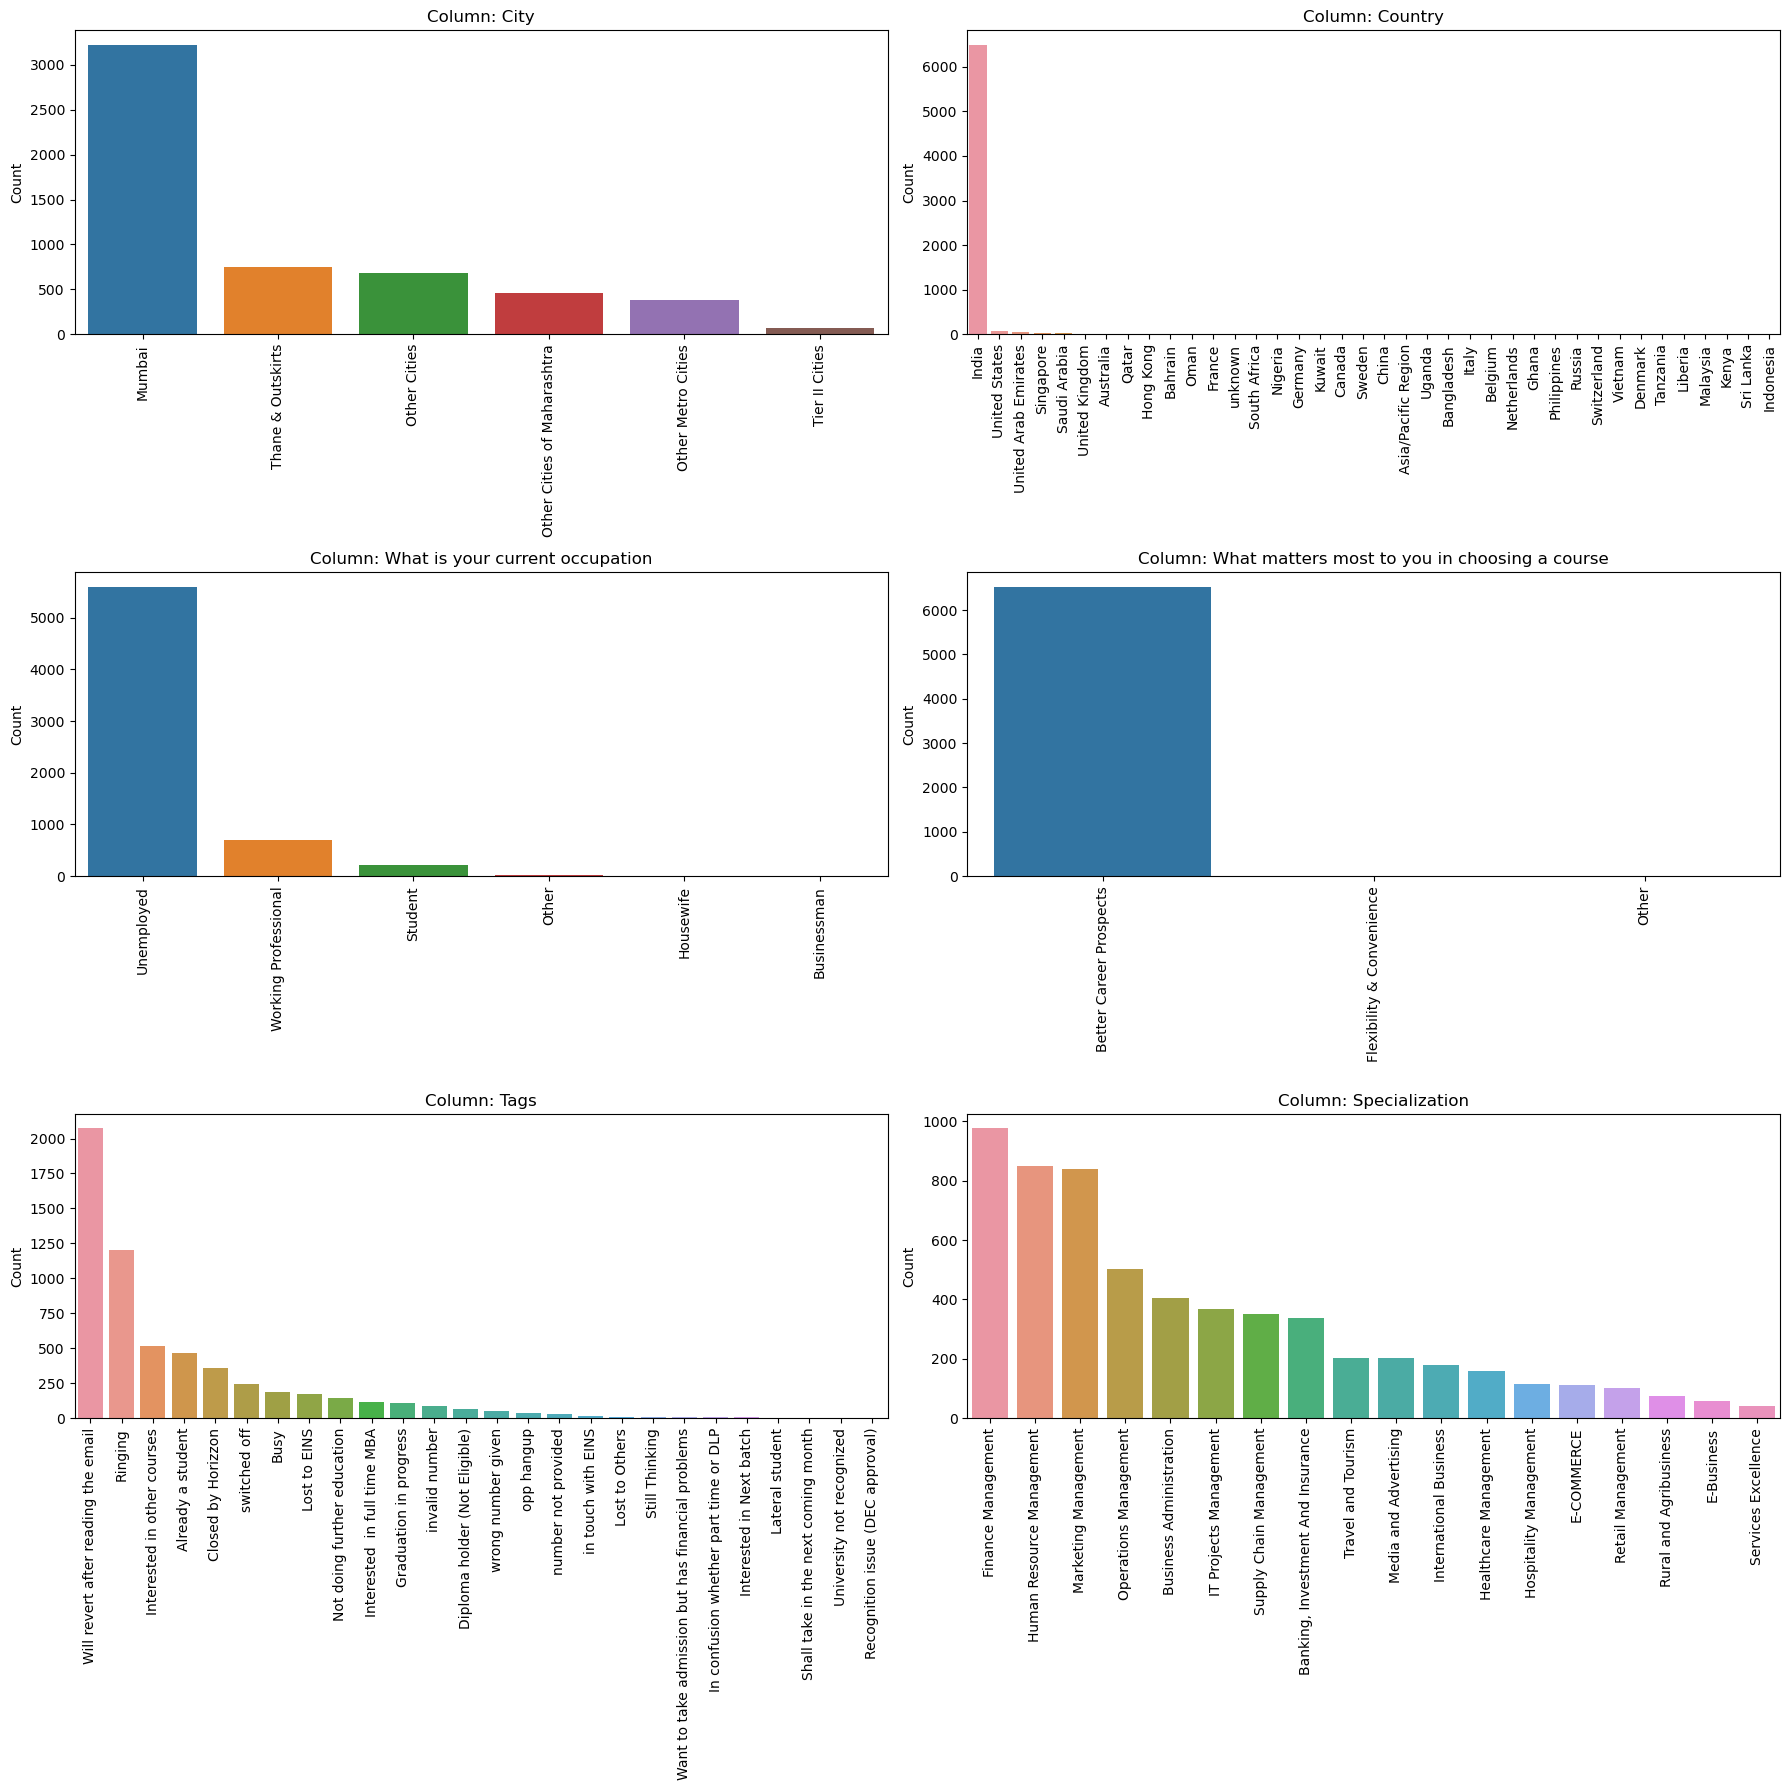

In [21]:
columns_to_plot = ['City', 'Country', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Specialization']
plot_countplots(leads_df, columns_to_plot)

#### Key observations:

1. **'Mumbai'** has the highest number of leads based on the city count plot.

2. The majority of leads are based in **'India'**.

3. **'Unemployment'** is the prevailing current occupation among leads.

4. **'Better Career prospects'** hold great importance for the majority of leads when choosing a course.

5. A significant portion of leads falls into the category **'Will revert after reading the email'** as customers.

6. **'Finance Management'** is the most specialized field among leads, followed by Human Resource and Manufacturing Management.

### 3.4 Imputing the missing data for the appropriate columns that have null values

In [22]:
# A function to calculate and print the percentage distribution
def calculate_percentage_distribution(data, column):
    
    percentages = round(data[column].value_counts(normalize=True) * 100, 2)
    print (percentages)

##### 3.4.1 'City' Column  (39.71% missing values):

In [23]:
calculate_percentage_distribution(leads_df, 'City')

Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64


Given the predominant occurrence of **'Mumbai'** in this column, it is reasonable to replace missing values with this particular value.

In [24]:
# Replacing the missing data in the 'City' column with 'Mumbai'
leads_df['City']=leads_df['City'].replace(np.nan,'Mumbai')

##### 3.4.2 'Country' Column  (26.63% missing values):

In [25]:
calculate_percentage_distribution(leads_df, 'Country')

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Hong Kong                0.10
Bahrain                  0.10
Oman                     0.09
France                   0.09
unknown                  0.07
South Africa             0.06
Nigeria                  0.06
Germany                  0.06
Kuwait                   0.06
Canada                   0.06
Sweden                   0.04
China                    0.03
Asia/Pacific Region      0.03
Uganda                   0.03
Bangladesh               0.03
Italy                    0.03
Belgium                  0.03
Netherlands              0.03
Ghana                    0.03
Philippines              0.03
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

Given the predominant occurrence of **'India'** in this column, it is reasonable to replace missing values with this particular value.

In [26]:
# Replacing the missing data in the 'Country' column with 'India'
leads_df['Country']=leads_df['Country'].replace(np.nan,'India')

##### 3.4.3 'What is your current occupation' Column  (29.11% missing values):

In [27]:
calculate_percentage_distribution(leads_df, 'What is your current occupation')

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64


Given the predominant occurrence of **'Unemployed'** in this column, it is reasonable to replace missing values with this particular value.

In [28]:
# Replacing the missing data in the 'What is your current occupation' column with 'Unemployed'
leads_df['What is your current occupation']=leads_df['What is your current occupation'].replace(np.nan,'Unemployed')

##### 3.4.4 'What matters most to you in choosing a course' Column  (29.31% missing values):

In [29]:
calculate_percentage_distribution(leads_df, 'What matters most to you in choosing a course')

Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64


The column **'What is most important to you when selecting a course'** displays a notable imbalance, indicating a potential need for its elimination.

In [30]:
# Dropping this column 
leads_df=leads_df.drop('What matters most to you in choosing a course',axis=1)

##### 3.4.5 'Tags' Column  (36.28% missing values):

In [31]:
calculate_percentage_distribution(leads_df, 'Tags')

Will revert after reading the email                  35.20
Ringing                                              20.43
Interested in other courses                           8.71
Already a student                                     7.90
Closed by Horizzon                                    6.08
switched off                                          4.08
Busy                                                  3.16
Lost to EINS                                          2.97
Not doing further education                           2.46
Interested  in full time MBA                          1.99
Graduation in progress                                1.89
invalid number                                        1.41
Diploma holder (Not Eligible)                         1.07
wrong number given                                    0.80
opp hangup                                            0.56
number not provided                                   0.46
in touch with EINS                                    0.

Given the predominant occurrence of **'Will revert after reading the email'**  in this column, it is reasonable to replace missing values with this particular value.

In [32]:
# Replacing the missing data in the 'Tags' column with 'Will revert after reading the email'
leads_df['Tags']=leads_df['Tags'].replace(np.nan,'Will revert after reading the email')

##### 3.4.6 'Specialization' Column  (36.58% missing values):

In [33]:
calculate_percentage_distribution(leads_df, 'Specialization')

Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness                1.25
E-Business                            0.97
Services Excellence                   0.68
Name: Specialization, dtype: float64


In [34]:
# The absence of a specialization in the lead's information may be due to it not being listed. In this case, we will substitute the missing values with 'Others'
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Others')

In [35]:
# Calculating null value percentage after Imputing for null values
calculate_and_print_null_percentage(leads_df)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
City                                        0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Search                                      0.000000
Newspaper Article                           0.000000
Magazine                                    0.

The remaining missing values account for less than 2% of the data, so it is advisable to remove these rows.

In [36]:
# Dropping the rows with null values
leads_df.dropna(inplace = True)

In [37]:
# Calculating null value percentage after removing columns mentioned above
calculate_and_print_null_percentage(leads_df)

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Specialization                              0.0
Country                                     0.0
Last Activity                               0.0
Page Views Per Visit                    

## Step 4 : Exploratory Data Analysis

### 4.1 Visualising the data

In [38]:
# A function to Box plot for numerical columns present in a dataframe
def create_boxplot(dataframe, columns, xlabels):
    sns.set(style="whitegrid")
    num_plots = len(columns)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    axes = axes.ravel()

    for i, column in enumerate(columns):
        sns.boxplot(x=column, data=dataframe, orient="v", ax=axes[i])
        axes[i].set_xlabel(xlabels[i], fontsize=12)
        axes[i].set_title(f'Outliers in {xlabels[i]}', fontsize=15)

    for i in range(num_plots, num_rows * 2):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

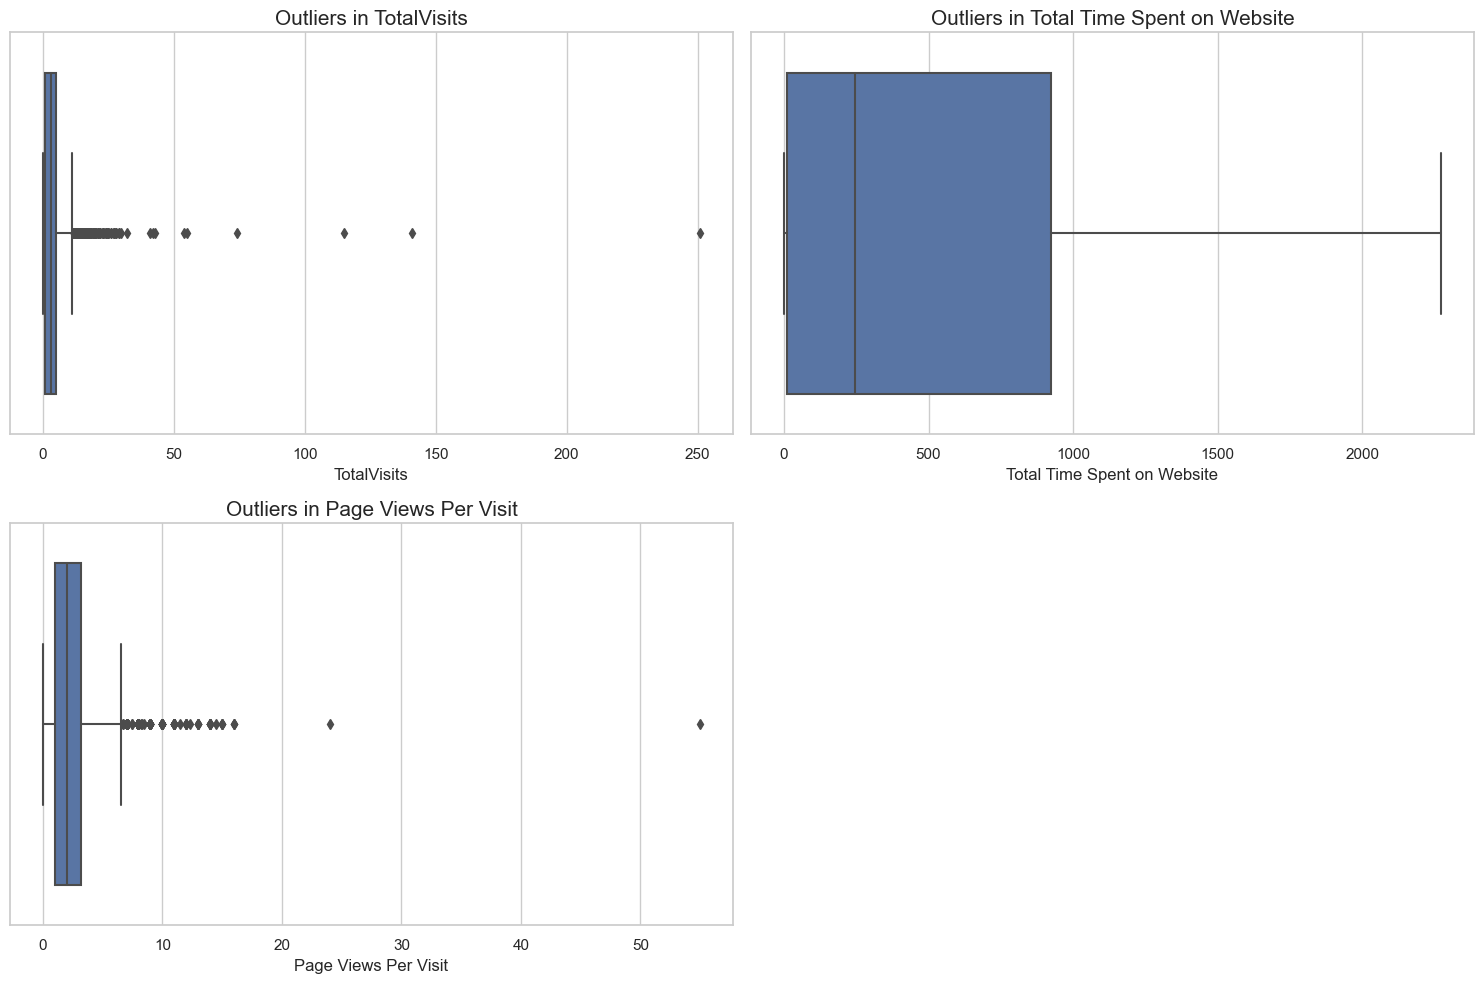

In [39]:
# Plotting the box plots for numerical columns present in the dataframe
numerical_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
create_boxplot(leads_df, numerical_columns, numerical_columns)

Observing the data, it's evident that several outliers are present.

In [40]:
# Checking percentile values for these numerical columns
percentiles_to_calculate = [0.01, 0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99]

description = leads_df[numerical_columns].describe(percentiles=percentiles_to_calculate)
description

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000


In [41]:
# A function to cap the outliers
def cap_outliers(df, column, lower_percentile, upper_percentile):
    percentiles = df[column].quantile([lower_percentile, upper_percentile]).values
    df[column] = df[column].clip(percentiles[0], percentiles[1])

In [42]:
# Eliminating outliers based on the Interquartile Range (IQR)
# We will limit the outliers to the 95th percentile value for the purpose of analysis

for column in numerical_columns:
    cap_outliers(leads_df, column, 0.05, 0.95)

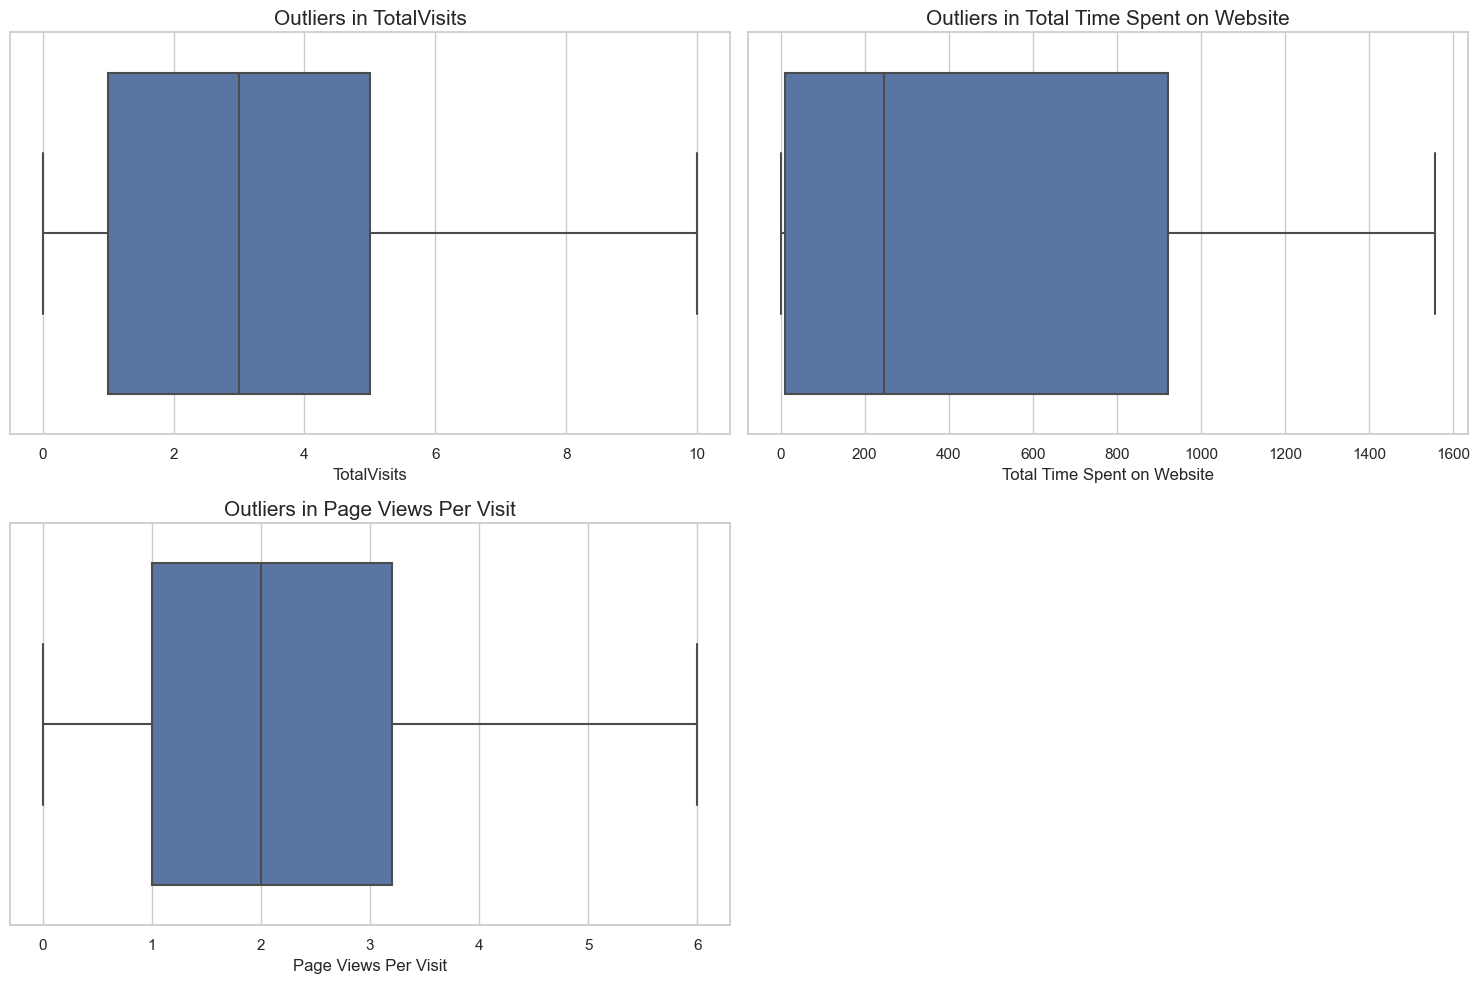

In [43]:
# Checking the box plots after the outlier's treatment
create_boxplot(leads_df, numerical_columns, numerical_columns)

#### 4.1.1 Univariate Analysis on categorical columns

In [44]:
# A function to plot the categorical columns against the target variable
def plot_countplot(data, x_column, rotation=90, hue_column="Converted"):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=x_column, hue=hue_column, data=data)
    plt.xticks(rotation = rotation)
    plt.show()

In [45]:
# A function to group entries in a column with low frequencies into a collective category labeled as 'Others'
def combine_sources(source_column, source):
    if source_column in source:
        return 'Others'
    else:
        return source_column

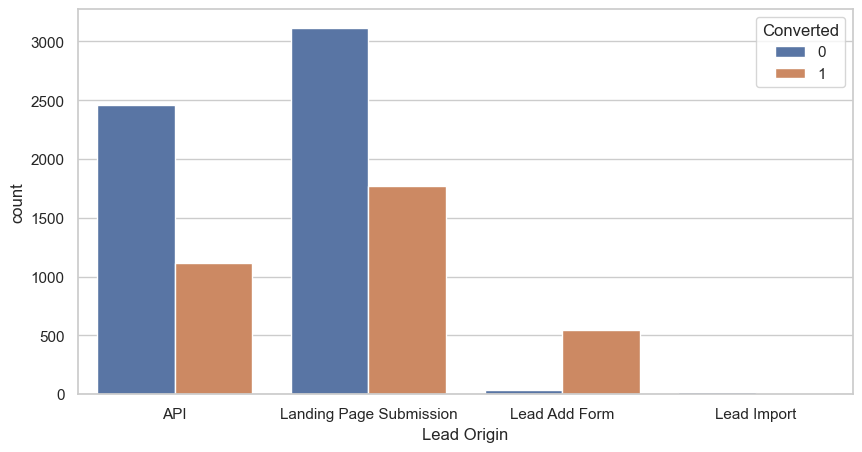

In [46]:
# 1. 'Lead Origin'
plot_countplot(leads_df, x_column='Lead Origin', rotation=0)

**Observations :**

1. API and Landing Page Submissions exhibit a conversion rate of 30-35%, generating a considerable number of leads.

2. The Lead Add Form achieves an impressive conversion rate exceeding 90%, though the overall lead count from this source is relatively low.

3. Lead Imports contribute minimally to the lead count and are relatively low in number.

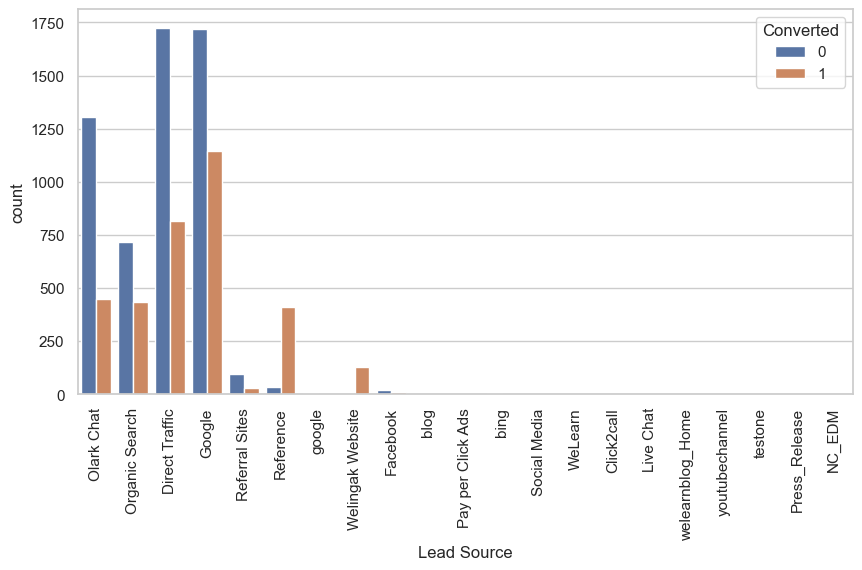

In [47]:
# 2. 'Lead Source'
plot_countplot(leads_df, x_column='Lead Source', rotation=90)

In [48]:
# Since 'Google' & 'google' are the same. Replacing it
leads_df.loc[leads_df['Lead Source'] == 'google', 'Lead Source'] = 'Google'

# Since 'Facebook' is a social media, replacing it with 'Social Media'
leads_df.loc[leads_df['Lead Source'] == 'Facebook', 'Lead Source'] = 'Social Media'

In [49]:
# Let's consolidate sources with fewer occurrences to streamline our analysis
lead_source_others = ['bing', 'Click2call', 'Live Chat', 'Press_Release', 'welearnblog_Home', 'blog', 'testone', 'NC_EDM', 'youtubechannel', 'Pay per Click Ads', 'WeLearn']
leads_df['Lead Source'] = leads_df['Lead Source'].apply(lambda x: combine_sources(x, lead_source_others))

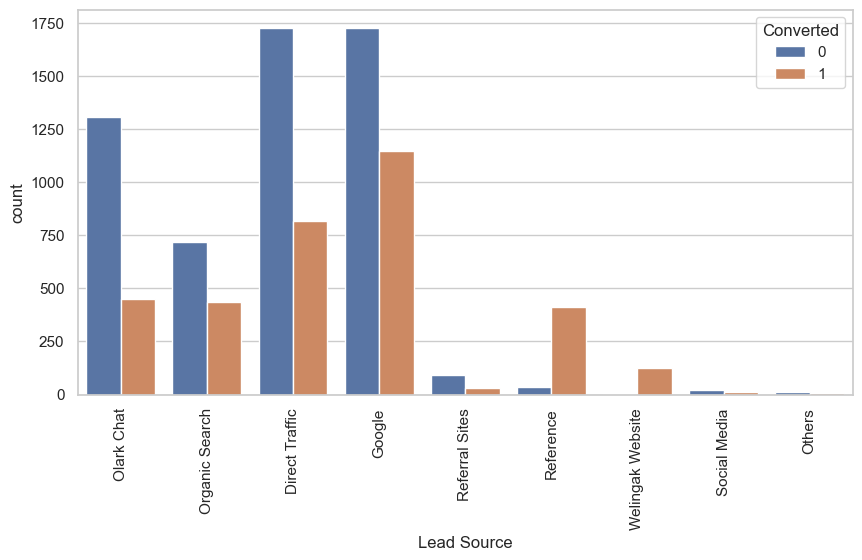

In [50]:
# plotting the count plot for 'Lead Source' after the above operation
plot_countplot(leads_df, x_column='Lead Source', rotation=90)

**Observations :**
    
1. Google and Direct Traffic are the primary sources of leads.
2. Leads originating from Google exhibit the highest likelihood of conversion.
3. Leads sourced from "Reference" show the greatest probability of conversion.

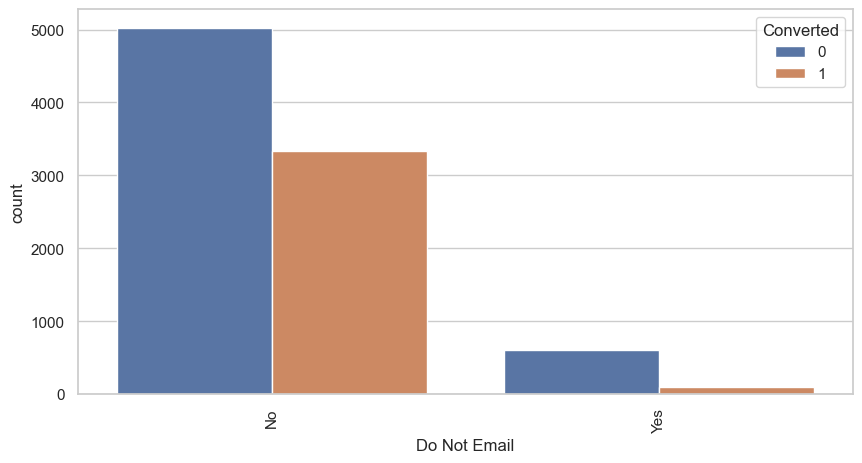

In [51]:
# 3. 'Do Not Email'
plot_countplot(leads_df, x_column='Do Not Email', rotation=90)

**Observations :**

1. A lower conversion rate is observed among customers who opt for "Do Not Mail."
2. The majority of leads, representing customers who do not choose "Do Not Mail" exhibit a higher conversion rate of around 40%.

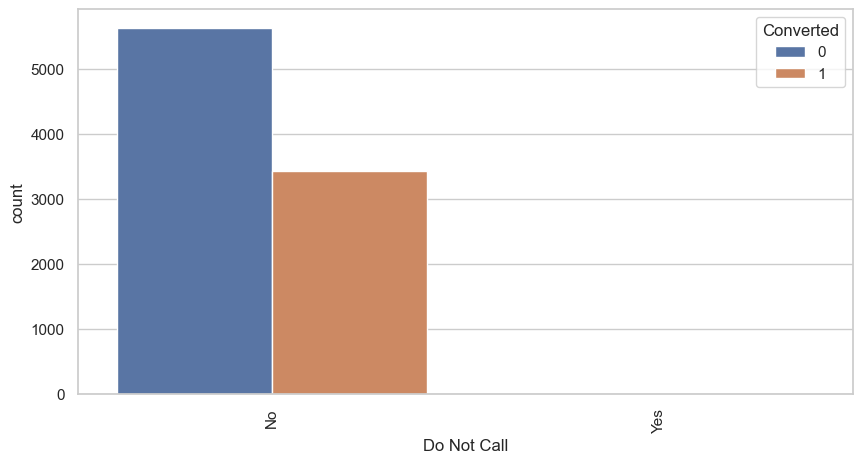

In [52]:
# 4. 'Do Not Call'
plot_countplot(leads_df, x_column='Do Not Call', rotation=90)

**Observation:**
    
1. Customers who refrain from opting for "Do Not Call" experience a higher conversion rate and represent the majority of the lead population.

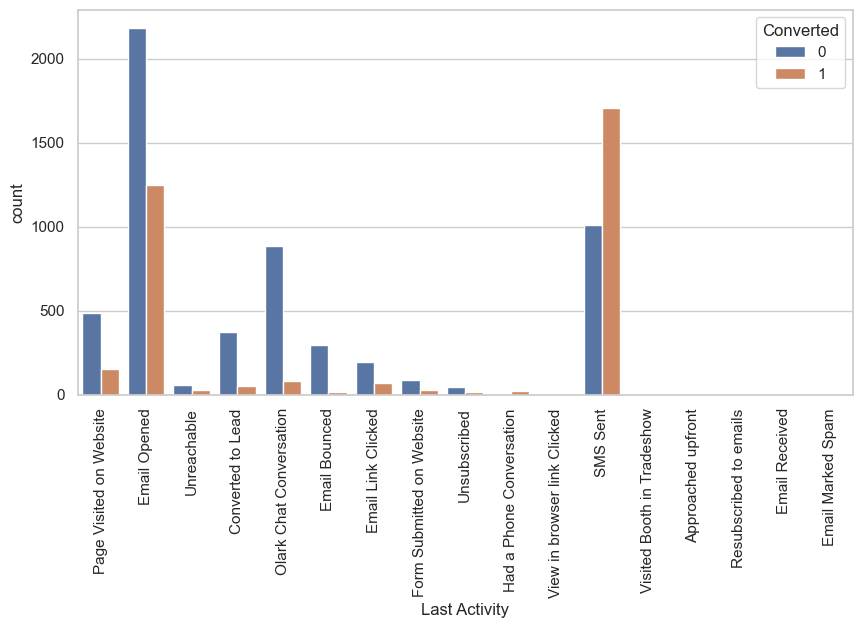

In [53]:
# 5. 'Last Activity'
plot_countplot(leads_df, x_column='Last Activity', rotation=90)

In [54]:
# Let's consolidate sources with fewer occurrences to streamline our analysis
last_activity_others = ['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Form Submitted on Website',
'Resubscribed to emails','Approached upfront','Email Received','View in browser link Clicked']
leads_df['Last Activity'] = leads_df['Last Activity'].apply(lambda x: combine_sources(x, last_activity_others))

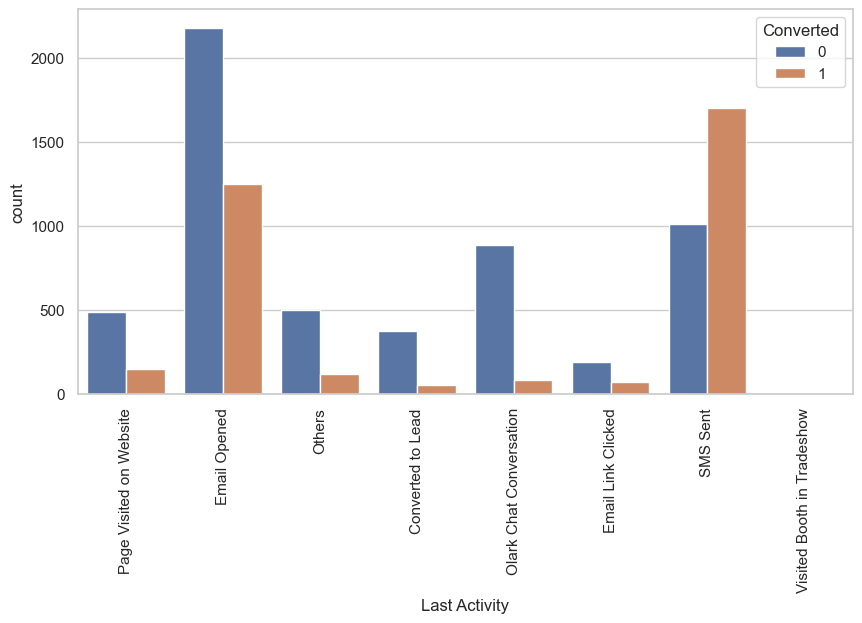

In [55]:
# plotting the count plot for 'Last Activity' after the above operation
plot_countplot(leads_df, x_column='Last Activity', rotation=90)

**Observations :**
    
1. Customers whose last activity was "SMS Sent" exhibit a notably higher conversion rate of approximately 60%.
2. The majority of customers have "Email Opened" as their last activity.

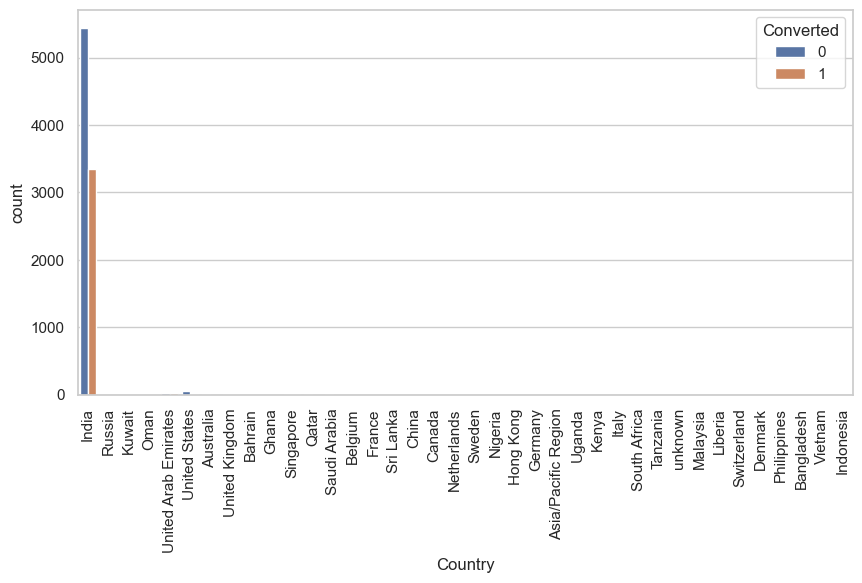

In [56]:
# 6. 'Country'
plot_countplot(leads_df, x_column='Country', rotation=90)

**Observations :**
    
Since the majority of values are "India," it is not possible to make any meaningful conclusions or inferences.

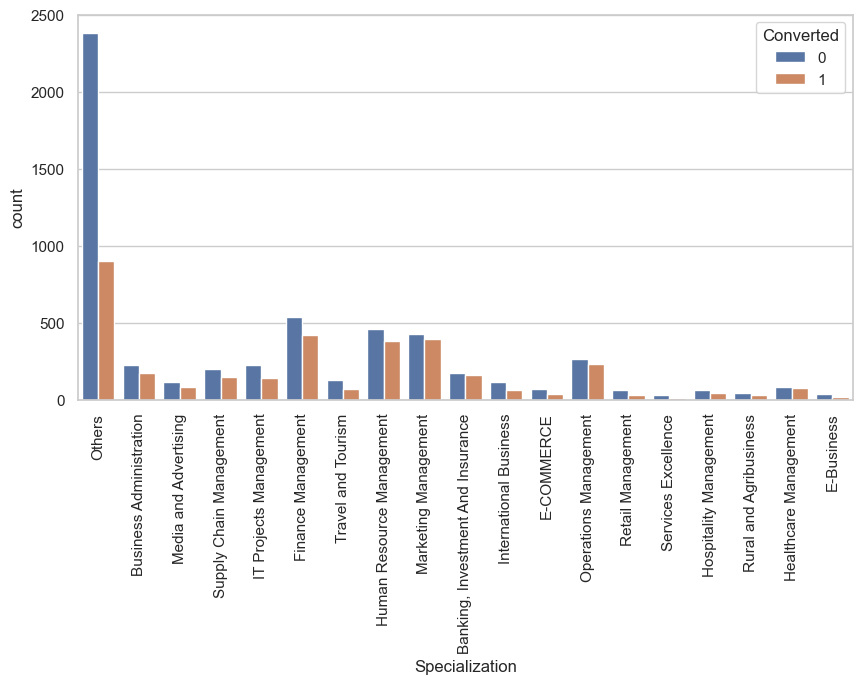

In [57]:
# 7. 'Specialization'
plot_countplot(leads_df, x_column='Specialization', rotation=90)

**Observations :**
    
1. The largest proportion of leads specify their specialization as "Management" or fall under the category of "Others."
2. Leads indicating a specialization in "Rural & Agribusiness" exhibit the lowest likelihood of conversion.

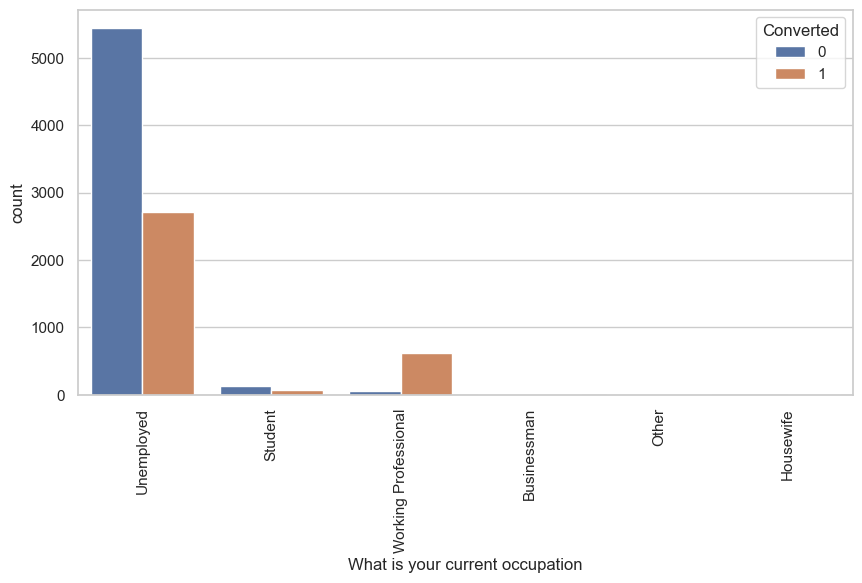

In [58]:
# 8. 'What is your current occupation'
plot_countplot(leads_df, x_column='What is your current occupation', rotation=90)

**Observations :**
    
1. Individuals who are currently employed and opt for the course show a notably elevated probability of enrollment.
2. Although unemployed leads constitute the largest group, their conversion rate typically ranges from 30% to 35%.

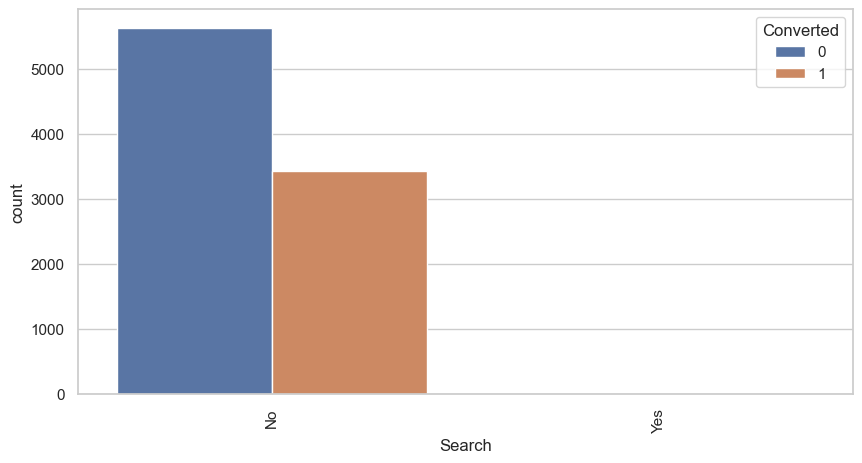

In [59]:
# 9. 'Search'
plot_countplot(leads_df, x_column='Search', rotation=90)

**Observations :**
    
Given that the majority of entries are labeled as "No," it is not possible to derive any meaningful insights or conclusions from this parameter.

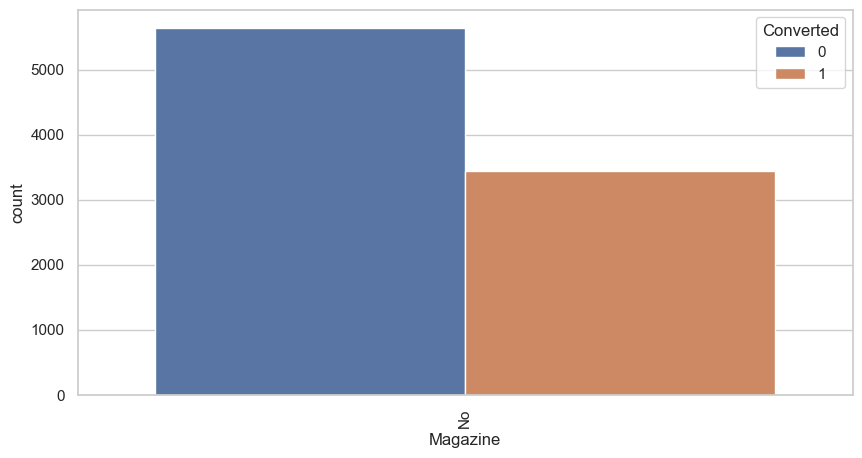

In [60]:
# 10. 'Magazine'
plot_countplot(leads_df, x_column='Magazine', rotation=90)

**Observations :**

Given that the majority of entries are labeled as "No," it is not possible to derive any meaningful insights or conclusions from this parameter.

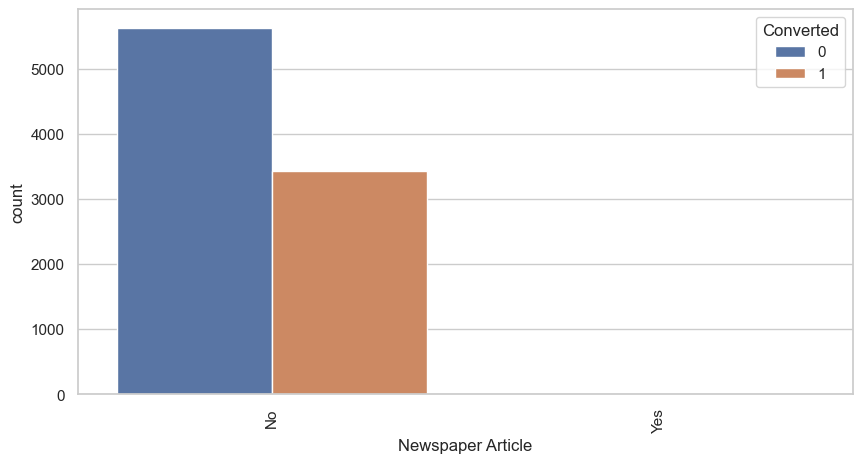

In [61]:
# 11. 'Newspaper Article'
plot_countplot(leads_df, x_column='Newspaper Article', rotation=90)

**Observations :**

Given that the majority of entries are labeled as "No," it is not possible to derive any meaningful insights or conclusions from this parameter.

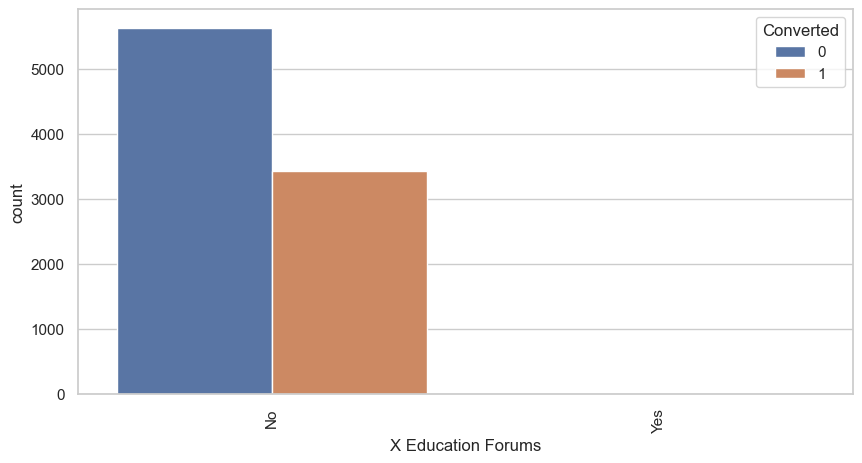

In [62]:
# 12. 'X Education Forums'
plot_countplot(leads_df, x_column='X Education Forums', rotation=90)

**Observations :**

Given that the majority of entries are labeled as "No," it is not possible to derive any meaningful insights or conclusions from this parameter.

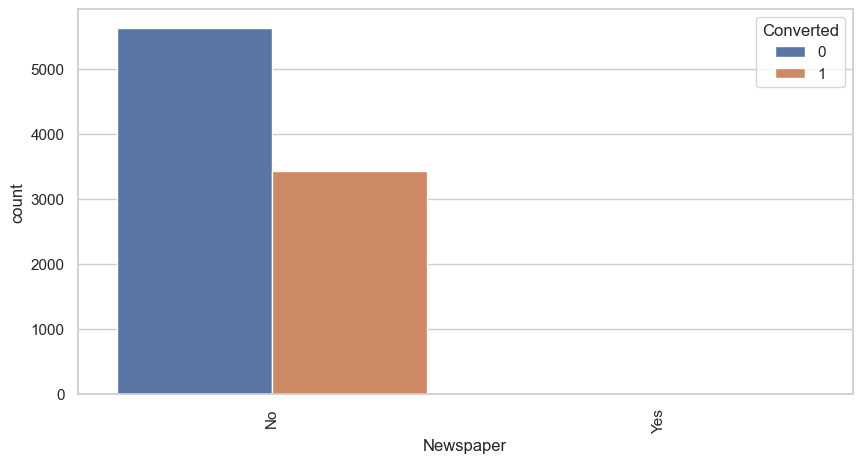

In [63]:
# 13. 'Newspaper'
plot_countplot(leads_df, x_column='Newspaper', rotation=90)

**Observations :**

Given that the majority of entries are labeled as "No," it is not possible to derive any meaningful insights or conclusions from this parameter.

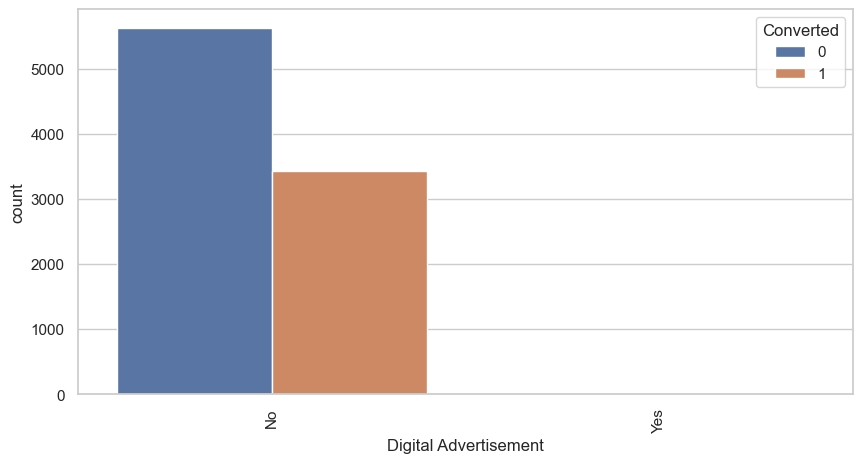

In [64]:
# 14. 'Digital Advertisement'
plot_countplot(leads_df, x_column='Digital Advertisement', rotation=90)

**Observations :**

Given that the majority of entries are labeled as "No," it is not possible to derive any meaningful insights or conclusions from this parameter.

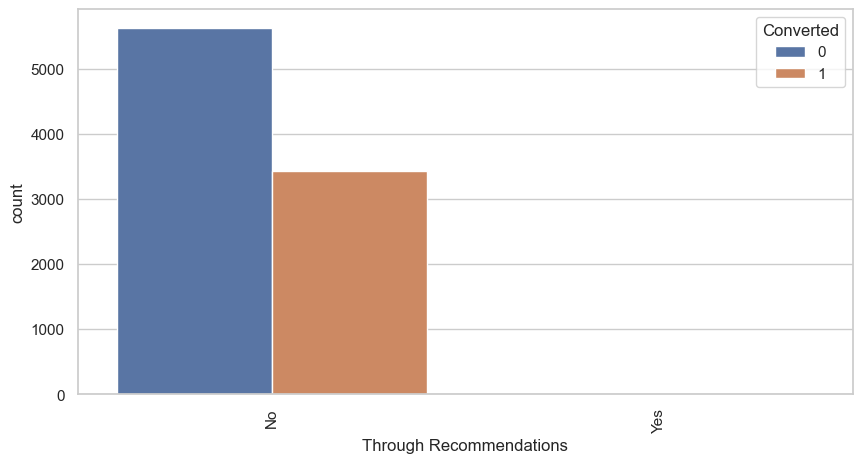

In [65]:
# 15. 'Through Recommendations'
plot_countplot(leads_df, x_column='Through Recommendations', rotation=90)

**Observations :**

Given that the majority of entries are labeled as "No," it is not possible to derive any meaningful insights or conclusions from this parameter.

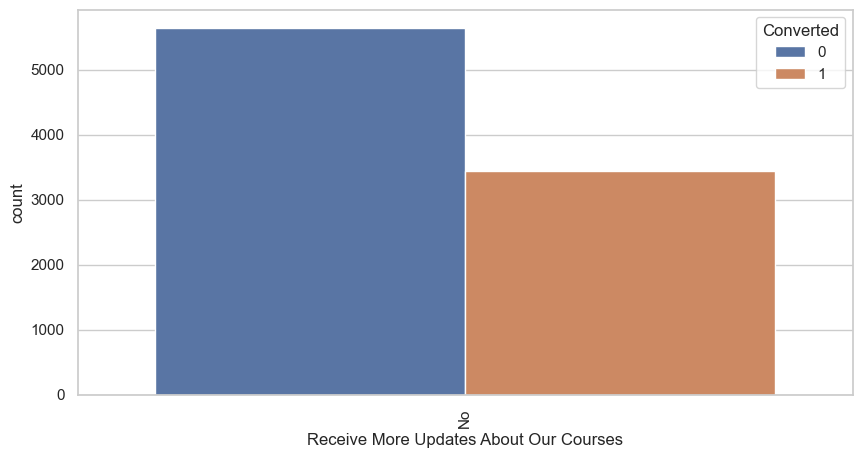

In [66]:
# 16. 'Receive More Updates About Our Courses'
plot_countplot(leads_df, x_column='Receive More Updates About Our Courses', rotation=90)

**Observations :**

Given that the majority of entries are labeled as "No," it is not possible to derive any meaningful insights or conclusions from this parameter.

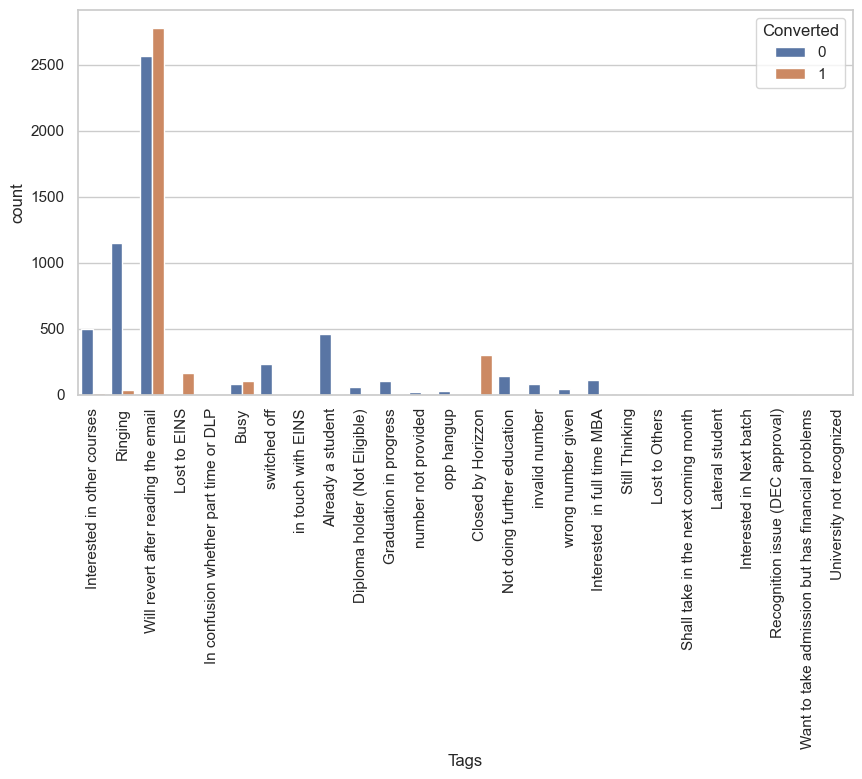

In [67]:
# 17. 'Tags'
plot_countplot(leads_df, x_column='Tags', rotation=90)

**Observations :**

It is advisable to prioritize leads who are likely to respond after reading the email, as well as other potential leads, due to their higher conversion rates.

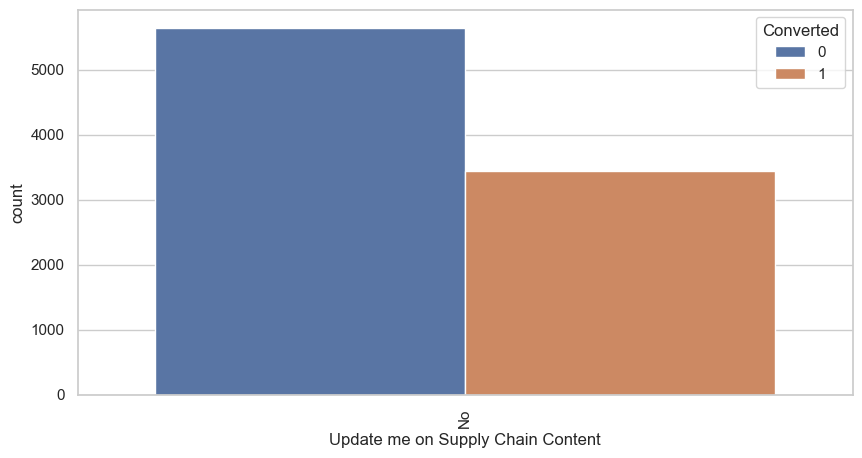

In [68]:
# 18. 'Update me on Supply Chain Content'
plot_countplot(leads_df, x_column='Update me on Supply Chain Content', rotation=90)

**Observations :**

Given that the majority of entries are labeled as "No," it is not possible to derive any meaningful insights or conclusions from this parameter.

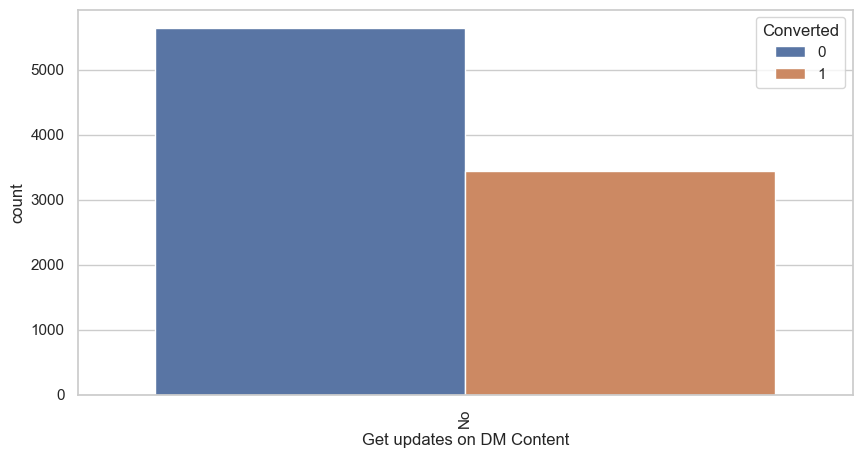

In [69]:
# 19. 'Get updates on DM Content'
plot_countplot(leads_df, x_column='Get updates on DM Content', rotation=90)

**Observations :**

Given that the majority of entries are labeled as "No," it is not possible to derive any meaningful insights or conclusions from this parameter.

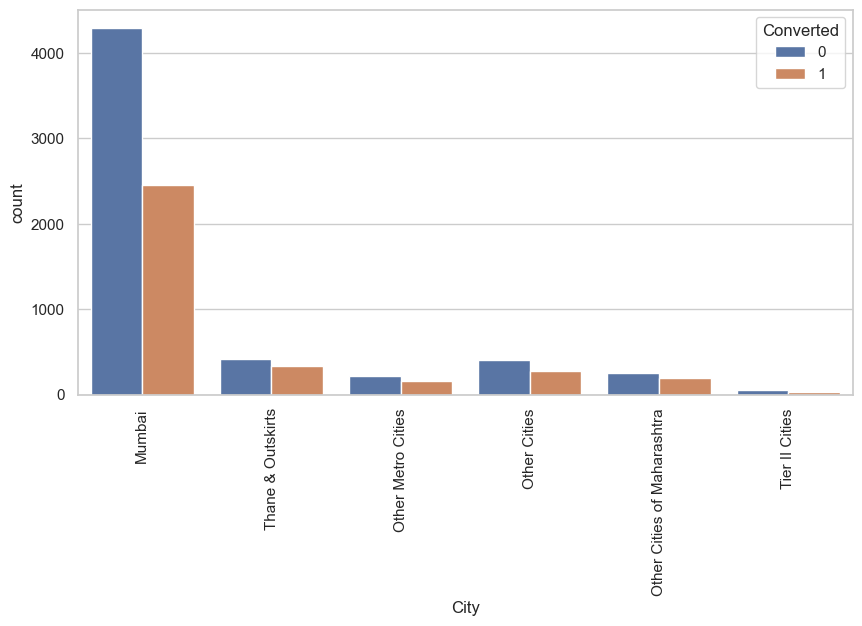

In [70]:
# 20. 'City'
plot_countplot(leads_df, x_column='City', rotation=90)

**Observations :**
    
Mumbai city accounts for the majority of leads, making it a prime target for focused efforts, given the potential within this customer base.

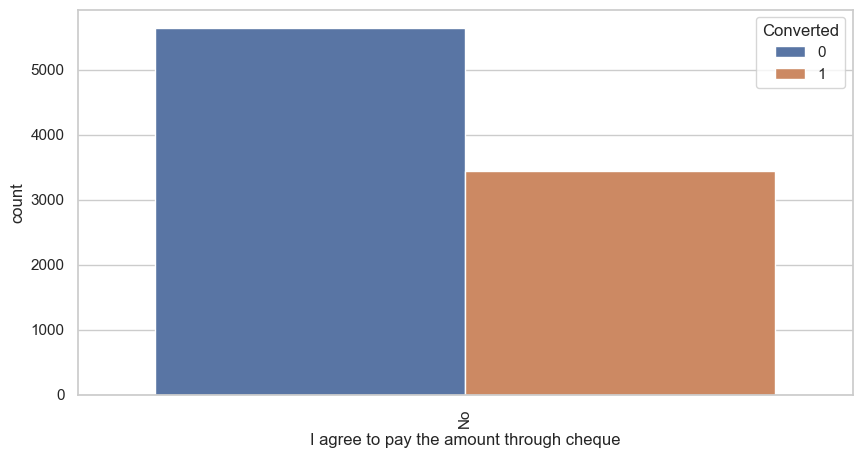

In [71]:
# 21. 'I agree to pay the amount through cheque'
plot_countplot(leads_df, x_column='I agree to pay the amount through cheque', rotation=90)

**Observations :**
    
Mumbai city accounts for the majority of leads, making it a prime target for focused efforts, given the potential within this customer base.

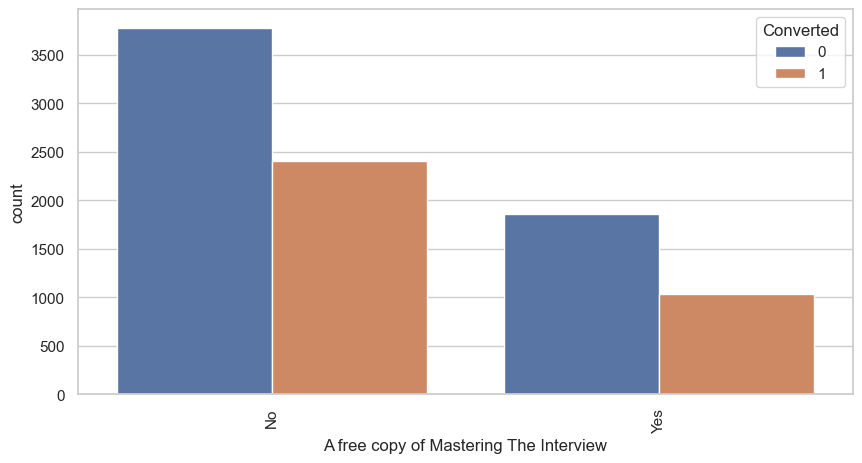

In [72]:
# 22. 'A free copy of Mastering The Interview'
plot_countplot(leads_df, x_column='A free copy of Mastering The Interview', rotation=90)

**Observations :**
    
The number of customers requesting a free copy of "Mastering the Interview" is relatively low, yet interestingly, both types of customers exhibit similar conversion probabilities.

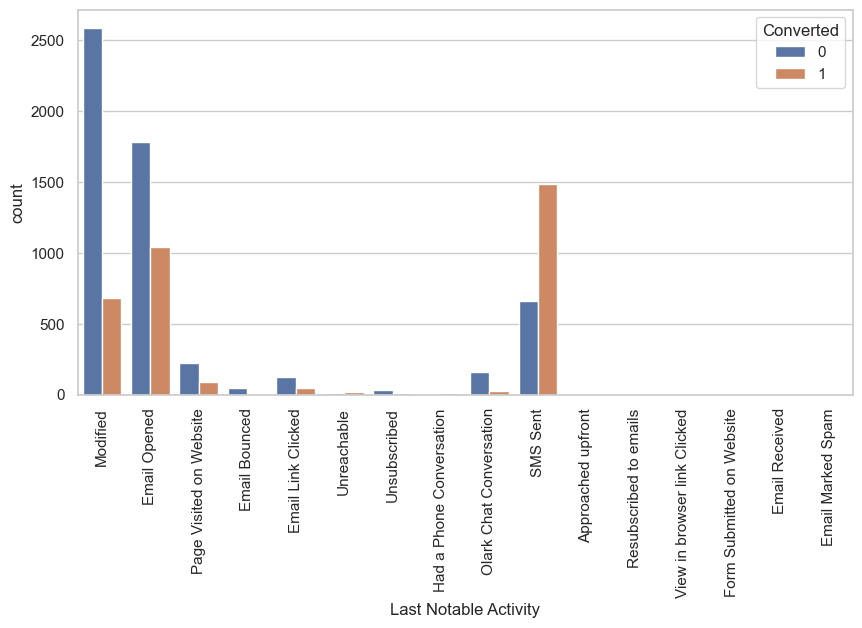

In [73]:
# 23. 'Last Notable Activity'
plot_countplot(leads_df, x_column='Last Notable Activity', rotation=90)

**Observations :**
    
1. The customer segment whose last significant activity was labeled as "Modified" comprises a larger population.
2. Customers whose last notable activity was "SMS Sent" display a higher likelihood of conversion.

#### 4.1.2 Univariate Analysis on numerical columns

In [74]:
# A function to Box plot to understand the relation between numerical columns with the Converted variable (dependent variable).
def plot_boxplot(y_variable, data, x_variable = 'Converted', title=None):
    sns.boxplot(y=y_variable, x=x_variable, data=data)
    if title is not None:
        plt.title(title)
    plt.show()

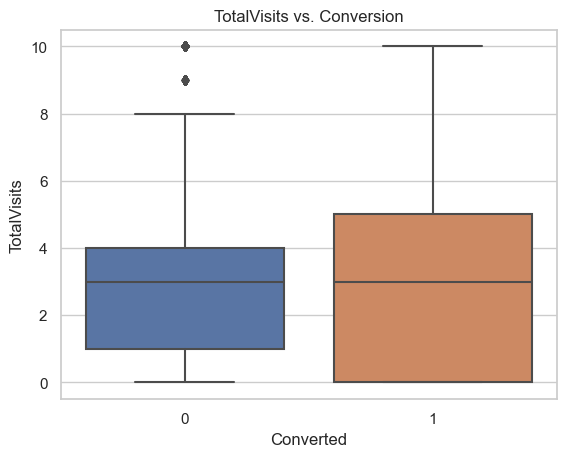

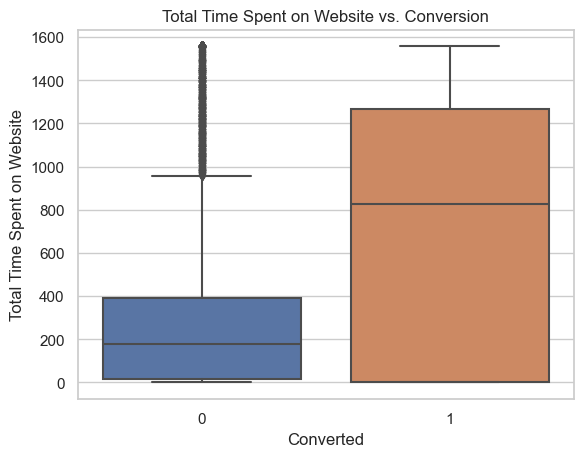

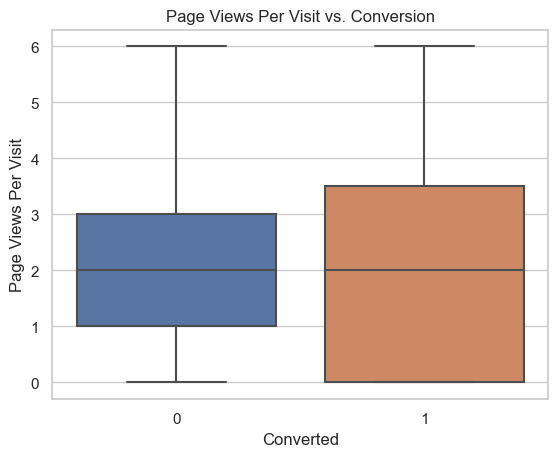

In [75]:
num_columns_box_plot = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

for column in num_columns_box_plot:
    plot_boxplot(y_variable=column, data=leads_df, title=f'{column} vs. Conversion')

**Observations :**
    
1. The median for both converted and unconverted leads is identical, and as such, no conclusions can be drawn based on the Total Visits metric.

2. Leads that invest more time on the website are more likely to convert, suggesting the need for enhanced website engagement strategies to prolong lead visits and improve conversion rates.

3. The median values for both converted and unconverted leads are equal, and thus no specific conclusions can be made regarding lead conversion based on the Page Views Per Visit metric.

After conducting univariate analysis, it's evident that several columns do not contribute valuable information to the model. Therefore, we can safely omit these columns in the subsequent analysis.

In [76]:
# Dropping the columns that does not aid in our analysis
columns_to_drop = ['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                   'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                   'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                   'A free copy of Mastering The Interview']

leads_df.drop(columns=columns_to_drop, inplace=True)

#### checking the shape, info and describe of the leads dataframe after dropping the columns - leads_df

In [77]:
# Checking the shape
leads_df.shape

(9074, 14)

In [78]:
# Checking the info
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

In [79]:
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.191867,474.472559,2.265943
std,0.485053,2.780618,526.060205,1.790991
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,10.000000,1557.000000,6.000000


In [80]:
# A function to find the top 10 correlations
def top_ten_correlations(df):
    
    corr_df = df.corr().stack().reset_index()
    corr_df.columns = ['VAR1', 'VAR2', 'CORRELATION']
    
    # Remove duplicated correlations and self-correlations
    corr_df = corr_df[(corr_df['VAR1'] < corr_df['VAR2']) & (corr_df['VAR1'] != corr_df['VAR2'])]
    
    corr_df.dropna(subset=['CORRELATION'], inplace=True)
    corr_df.sort_values('CORRELATION', ascending=False, inplace=True)
    top_10_corr = corr_df.head(10)

    print(top_10_corr)

In [81]:
# printing top 10 correlations - Excluding self correlation
top_ten_correlations(leads_df)

                           VAR1                         VAR2  CORRELATION
13         Page Views Per Visit                  TotalVisits     0.766567
14         Page Views Per Visit  Total Time Spent on Website     0.370508
9   Total Time Spent on Website                  TotalVisits     0.367134
2                     Converted  Total Time Spent on Website     0.362824
1                     Converted                  TotalVisits     0.050742
3                     Converted         Page Views Per Visit     0.000329


In [82]:
# Lets find out the conversion rate
Converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Converted

37.85541106458012

We have a conversion rate of **37.85%**

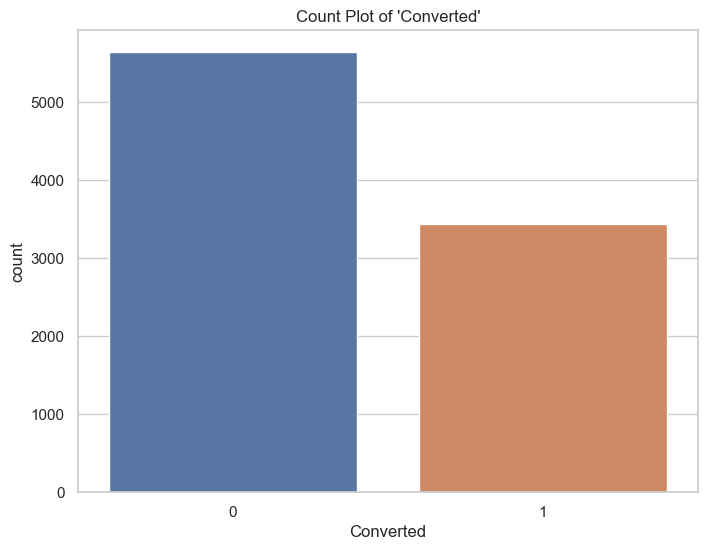

In [83]:
# plotting the conversion rate
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=leads_df, x='Converted')
plt.title("Count Plot of 'Converted'")

# Display the plot
plt.show()

## Step 5 : Linear Regression

### 5.1 Data Preparation

#### 5.1.1 Creating Dummy Variables for all categorical variables

Categorical variables to create dummy variables for:
  1. **Lead Origin**
  2. **Lead Score**
  3. **Last Activity**
  4. **Specialization**
  5. **What is your current occupation**
  6. **City**
  7. **Last Notable Activity**

In [84]:
categorical_columns = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                       'What is your current occupation', 'City', 'Last Notable Activity']

leads_df = pd.concat([leads_df, pd.get_dummies(leads_df[categorical_columns], drop_first=True)], axis=1)
leads_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### 5.1.2 Converting Yes/No values for some columns into 1/0

In [85]:
binary_var = ['Do Not Email', 'Do Not Call']

leads_df[binary_var] = leads_df[binary_var].applymap(lambda x: 1 if x == 'Yes' else 0)

#### 5.1.3. Removing the columns for which dummy variables have been generated

In [86]:
leads_df = leads_df.drop(categorical_columns, axis = 1)

In [87]:
# Checking the head after converting
leads_df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### 5.2 Splitting data into 'Test' and 'Train' set

In [88]:
# All independent variables in X
X = leads_df.drop(['Prospect ID','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [89]:
# Setting the target variable y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [90]:
# Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [91]:
# Check the shape of X_train
X_train.shape

(6351, 66)

In [92]:
# Check the shape of X_test
X_test.shape

(2723, 66)

In [93]:
# Checking the y_train shape
y_train.shape

(6351,)

In [94]:
# Check the shape of X_train columns
X_train.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_H

### 5.3 Rescaling the variables using MinMaxScaling

In [95]:
# Scaling the numerical variables using 'MinMaxScaling'
scaler = MinMaxScaler()

cont_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Fit and transform training set only
X_train[cont_vars] = scaler.fit_transform(X_train[cont_vars])

In [96]:
# Check the shape of X_train after 'Rescaling'
X_train.shape

(6351, 66)

In [97]:
# Check Training set after scaling
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,0.2,0.254978,0.333333,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,0.2,0.122030,0.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.0,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,0.2,0.886320,0.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.5,1.000000,0.416667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [98]:
# Checking the head
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.078885,0.000315,0.320627,0.305778,0.379863,0.535979,0.068651,0.003779,0.320737,0.186427,0.127224,0.002362,0.051645,0.013384,0.004251,0.015903,0.028185,0.373799,0.105338,0.068808,0.070698,0.308298,0.000157,0.040309,0.006456,0.011967,0.104393,0.017635,0.012282,0.094316,0.040938,0.019682,0.091324,0.022359,0.054795,0.362778,0.011967,0.008818,0.003779,0.037632,0.021886,0.001102,0.001575,0.022201,0.898284,0.075894,0.074476,0.048181,0.041883,0.078885,0.008030,0.007243,0.018422,0.000315,0.305464,0.000157,0.000157,0.001889,0.359471,0.019052,0.034483,0.000157,0.244371,0.004094,0.004409,0.000157
std,0.269581,0.017744,0.278748,0.338027,0.300183,0.498743,0.252879,0.061362,0.466797,0.389482,0.333250,0.048545,0.221328,0.114920,0.065068,0.125110,0.165513,0.483849,0.307012,0.253147,0.256339,0.461827,0.012548,0.196698,0.080094,0.108744,0.305794,0.131631,0.110148,0.292291,0.198163,0.138916,0.288092,0.147859,0.227597,0.480839,0.108744,0.093494,0.061362,0.190319,0.146324,0.033184,0.039653,0.147349,0.302299,0.264849,0.262565,0.214166,0.200338,0.269581

### 5.4 Feature Selection - RFE

We will use Recursive Feature Elimination (RFE) to identify the most important features (variables or columns) in our dataset.

In [99]:
# A function to perform RFE
def perform_rfe(X_train, y_train, num_features_to_select):
    lr = LinearRegression()
    rfe = RFE(lr, n_features_to_select=num_features_to_select)
    rfe_model = rfe.fit(X_train, y_train)
    
    return rfe_model

In [100]:
# Performing RFE
rfe_model = perform_rfe(X_train, y_train, num_features_to_select=20)

In [101]:
# Check features chosen through RFE and their corresponding importance scores
feature_info = list(zip(X_train.columns, rfe_model.support_, rfe_model.ranking_))

# Check the feature information
feature_info

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Others', False, 22),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 44),
 ('Lead Source_Social Media', False, 17),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', False, 10),
 ('Last Activity_Olark Chat Conversation', False, 20),
 ('Last Activity_Others', False, 11),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_SMS Sent', False, 7),
 ('Last Activity_Visited Booth in Tradeshow', False, 45),
 ('Specialization_Business Administration', F

## Step 6 : Building the model

### 6.1 Model Building

In [102]:
# RFE-selected columns serve as the initial set for manual elimination.
cols = X_train.columns[rfe_model.support_]
print(cols)

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object')


In [103]:
# Features not selected by RFE
X_train.columns[~rfe_model.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
      

In [104]:
# Creating X_test dataframe with all of the RFE selected columns
X_train_rfe = X_train[cols]

In [105]:
# A function to build a model using GLM for the detailed statistics
def build_glm_model(X_train, y_train, cols):
    X_train_sm = sm.add_constant(X_train[cols])
    logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
    res = logm.fit()
    return res

In [106]:
# A function to calculate Variance Infation Factor (VIFs) and print them
def calculate_vif(X_train, cols):
    df1 = X_train[cols]
    vif = pd.DataFrame({'Features': df1.columns, 'VIF': [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]})
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by='VIF', ascending=False)
    print(vif)

### 6.2 Constructing Models

In [107]:
# A function to remove the given column name from the variable 'cols'
def remove_column_from_index(index, col_to_remove):
    cols_list = index.tolist()

    if col_to_remove in cols_list:
        cols_list.remove(col_to_remove)

        updated_index = pd.Index(cols_list)
        return updated_index
    else:
        return index

In [108]:
# A function to append the given column name from the variable 'cols'
def add_column_to_index(index, col_to_add):
    cols_list = index.tolist()

    if col_to_add not in cols_list:
        cols_list.append(col_to_add)

        updated_index = pd.Index(cols_list)
        return updated_index
    else:
        return index

#### Model 1 : Passing all the columns that we have obtained from RFE.

In [109]:
res = build_glm_model(X_train, y_train, cols)
display(res.summary())
calculate_vif(X_train, cols)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.5
Date:                Mon, 13 Nov 2023   Deviance:                       5275.1
Time:                        21:17:06   Pearson chi2:                 6.32e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3950
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7514      0.086     -8.767      0.000      -0.919      -0.583
Do Not Email                                            -1.7026      0.188     -9.053      0.000      -2.071      -1.334
Do Not Call                                             21.7857   3.35e+04      0.001      0.999   -6.56e+04    6.57e+04
Total Time Spent on Website                              3.4227      0.120     28.493      0.000       3.187       3.658
Lead Origin_Lead Add Form                                2.2456      0.933      2.406      0.016       0.416       4.075
Lead Origin_Lead Import                                  1.7643      0.463      3.811      0.000       0.857       2.672
Lead Source_Olark Chat                                   1.3993      0.116     12.069      0.000       1.172       1.626
Lead Source_Reference                                    1.9505      0.958      2.035      0.042       0.072       3.829
Lead Source_Welingak Website                             4.2531      1.186      3.587      0.000       1.929       6.577
Specialization_Others                                   -0.4200      0.088     -4.789      0.000      -0.592      -0.248
What is your current occupation_Housewife               22.7348   1.56e+04      0.001      0.999   -3.06e+04    3.06e+04
What is your current occupation_Working Professional     2.6652      0.190     13.995      0.000       2.292       3.038
Last Notable Activity_Email Bounced                     -1.1275      0.542     -2.081      0.037      -2.190      -0.065
Last Notable Activity_Email Link Clicked                -1.9075      0.260     -7.324      0.000      -2.418      -1.397
Last Notable Activity_Email Opened                      -1.4408      0.089    -16.191      0.000      -1.615      -1.266
Last Notable Activity_Form Submitted on Website        -22.4455   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Last Notable Activity_Modified                          -2.1233      0.093    -22.870      0.000      -2.305      -1.941
Last Notable Activity_Olark Chat Conversation           -2.7419      0.330     -8.308      0.000      -3.389      -2.095
Last Notable Activity_Page Visited on Website           -1.7166      0.204     -8.407      0.000      -2.117      -1.316
Last Notable Activity_Resubscribed to emails            22.3383   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Notable Activity_View in browser link Clicked     -22.0103   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
========================================================================================================================
"""

                                             Features    VIF
3                           Lead Origin_Lead Add Form  62.38
6                               Lead Source_Reference  48.06
7                        Lead Source_Welingak Website  15.50
8                               Specialization_Others   2.18
5                              Lead Source_Olark Chat   1.87
15                     Last Notable Activity_Modified   1.63
2                         Total Time Spent on Website   1.57
13                 Last Notable Activity_Email Opened   1.41
0                                        Do Not Email   1.21
10  What is your current occupation_Working Profes...   1.19
11                Last Notable Activity_Email Bounced   1.12
16      Last Notable Activity_Olark Chat Conversation   1.09
17      Last Notable Activity_Page Visited on Website   1.06
12           Last Notable Activity_Email Link Clicked   1.03
9           What is your current occupation_Housewife   1.01
4                       

In [110]:
# A function to plot heat map
def cor_heatmap(dataframe, title, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    sns.heatmap(dataframe.corr(), annot=True, cmap="RdYlGn", linewidths=0.5)
    plt.title(title)
    plt.show()

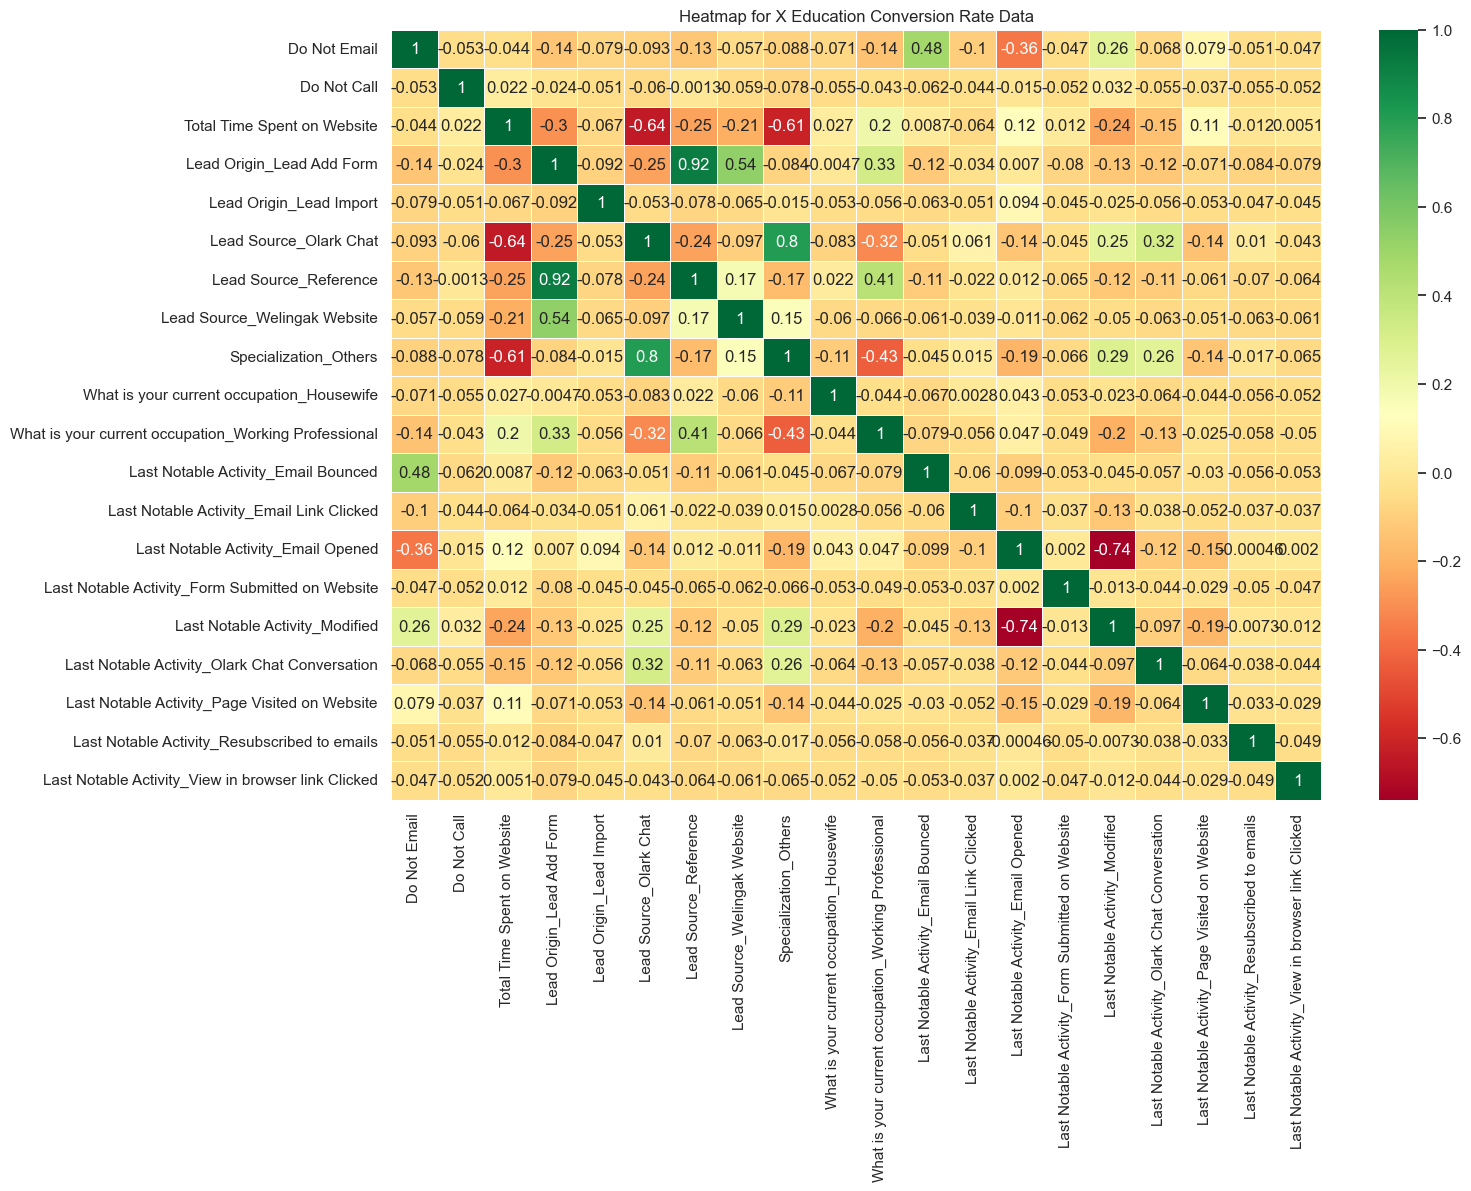

In [111]:
# Assessing the correlation between features selected through Recursive Feature Elimination (RFE) and the target column while also examining the influence of various features on the target.
cor_heatmap(leads_df[cols].corr(), 'Heatmap for X Education Conversion Rate Data', figsize = (15,10))

#### Model 2 : Dropping the column 'Last Notable Activity_Form Submitted on Website' as it has high P-value

In [112]:
# Dropping the variable 'Last Notable Activity_Form Submitted on Website' as it is insignificant because it has high p-value
col_to_remove = 'Last Notable Activity_Form Submitted on Website'
cols = remove_column_from_index(cols, col_to_remove)

# building the model and checking the VIF Values
res = build_glm_model(X_train, y_train, cols)
display(res.summary())
calculate_vif(X_train, cols)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2638.2
Date:                Mon, 13 Nov 2023   Deviance:                       5276.4
Time:                        21:17:07   Pearson chi2:                 6.32e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3948
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7544      0.086     -8.806      0.000      -0.922      -0.586
Do Not Email                                            -1.7013      0.188     -9.047      0.000      -2.070      -1.333
Do Not Call                                             21.7856   3.35e+04      0.001      0.999   -6.56e+04    6.57e+04
Total Time Spent on Website                              3.4241      0.120     28.505      0.000       3.189       3.660
Lead Origin_Lead Add Form                                2.2467      0.933      2.407      0.016       0.418       4.076
Lead Origin_Lead Import                                  1.7650      0.463      3.813      0.000       0.858       2.672
Lead Source_Olark Chat                                   1.4000      0.116     12.076      0.000       1.173       1.627
Lead Source_Reference                                    1.9503      0.958      2.035      0.042       0.072       3.829
Lead Source_Welingak Website                             4.2524      1.186      3.586      0.000       1.928       6.576
Specialization_Others                                   -0.4193      0.088     -4.781      0.000      -0.591      -0.247
What is your current occupation_Housewife               22.7354   1.56e+04      0.001      0.999   -3.06e+04    3.06e+04
What is your current occupation_Working Professional     2.6659      0.190     14.000      0.000       2.293       3.039
Last Notable Activity_Email Bounced                     -1.1269      0.542     -2.080      0.038      -2.189      -0.065
Last Notable Activity_Email Link Clicked                -1.9056      0.260     -7.317      0.000      -2.416      -1.395
Last Notable Activity_Email Opened                      -1.4388      0.089    -16.175      0.000      -1.613      -1.264
Last Notable Activity_Modified                          -2.1215      0.093    -22.857      0.000      -2.303      -1.940
Last Notable Activity_Olark Chat Conversation           -2.7406      0.330     -8.304      0.000      -3.387      -2.094
Last Notable Activity_Page Visited on Website           -1.7147      0.204     -8.398      0.000      -2.115      -1.315
Last Notable Activity_Resubscribed to emails            22.3397   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Notable Activity_View in browser link Clicked     -22.0074   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
========================================================================================================================
"""

                                             Features    VIF
3                           Lead Origin_Lead Add Form  62.38
6                               Lead Source_Reference  48.06
7                        Lead Source_Welingak Website  15.50
8                               Specialization_Others   2.18
5                              Lead Source_Olark Chat   1.87
14                     Last Notable Activity_Modified   1.63
2                         Total Time Spent on Website   1.57
13                 Last Notable Activity_Email Opened   1.41
0                                        Do Not Email   1.21
10  What is your current occupation_Working Profes...   1.19
11                Last Notable Activity_Email Bounced   1.12
15      Last Notable Activity_Olark Chat Conversation   1.09
16      Last Notable Activity_Page Visited on Website   1.06
12           Last Notable Activity_Email Link Clicked   1.03
9           What is your current occupation_Housewife   1.01
4                       

#### Model 3 : Dropping the column 'Last Notable Activity_Resubscribed to emails' as it has high P-Value

In [113]:
# Dropping the variable 'Last Notable Activity_Resubscribed to emails' as the VIF value is high
col_to_remove = 'Last Notable Activity_Resubscribed to emails'
cols = remove_column_from_index(cols, col_to_remove)

# building the model and checking the VIF Values
res = build_glm_model(X_train, y_train, cols)
display(res.summary())
calculate_vif(X_train, cols)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2638.8
Date:                Mon, 13 Nov 2023   Deviance:                       5277.5
Time:                        21:17:07   Pearson chi2:                 6.32e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3947
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7531      0.086     -8.793      0.000      -0.921      -0.585
Do Not Email                                            -1.7023      0.188     -9.051      0.000      -2.071      -1.334
Do Not Call                                             21.7863   3.35e+04      0.001      0.999   -6.56e+04    6.57e+04
Total Time Spent on Website                              3.4244      0.120     28.503      0.000       3.189       3.660
Lead Origin_Lead Add Form                                2.2463      0.933      2.406      0.016       0.417       4.076
Lead Origin_Lead Import                                  1.7655      0.463      3.814      0.000       0.858       2.673
Lead Source_Olark Chat                                   1.4026      0.116     12.103      0.000       1.175       1.630
Lead Source_Reference                                    1.9511      0.959      2.035      0.042       0.072       3.830
Lead Source_Welingak Website                             4.2531      1.186      3.586      0.000       1.929       6.578
Specialization_Others                                   -0.4187      0.088     -4.774      0.000      -0.591      -0.247
What is your current occupation_Housewife               22.7361   1.56e+04      0.001      0.999   -3.06e+04    3.06e+04
What is your current occupation_Working Professional     2.6660      0.190     13.999      0.000       2.293       3.039
Last Notable Activity_Email Bounced                     -1.1280      0.542     -2.081      0.037      -2.190      -0.066
Last Notable Activity_Email Link Clicked                -1.9080      0.260     -7.327      0.000      -2.418      -1.398
Last Notable Activity_Email Opened                      -1.4408      0.089    -16.200      0.000      -1.615      -1.266
Last Notable Activity_Modified                          -2.1237      0.093    -22.886      0.000      -2.306      -1.942
Last Notable Activity_Olark Chat Conversation           -2.7440      0.330     -8.315      0.000      -3.391      -2.097
Last Notable Activity_Page Visited on Website           -1.7164      0.204     -8.407      0.000      -2.117      -1.316
Last Notable Activity_View in browser link Clicked     -22.0087   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
========================================================================================================================
"""

                                             Features    VIF
3                           Lead Origin_Lead Add Form  62.38
6                               Lead Source_Reference  48.06
7                        Lead Source_Welingak Website  15.50
8                               Specialization_Others   2.18
5                              Lead Source_Olark Chat   1.87
14                     Last Notable Activity_Modified   1.63
2                         Total Time Spent on Website   1.57
13                 Last Notable Activity_Email Opened   1.41
0                                        Do Not Email   1.21
10  What is your current occupation_Working Profes...   1.19
11                Last Notable Activity_Email Bounced   1.12
15      Last Notable Activity_Olark Chat Conversation   1.09
16      Last Notable Activity_Page Visited on Website   1.06
12           Last Notable Activity_Email Link Clicked   1.03
9           What is your current occupation_Housewife   1.01
4                       

#### Model 4 : Dropping the column 'Last Notable Activity_View in browser link Clicked' as it has high P-value

In [114]:
# Dropping the variable 'Last Notable Activity_View in browser link Clicked' as it is insignificant because it has high p-value
col_to_remove = 'Last Notable Activity_View in browser link Clicked'
cols = remove_column_from_index(cols, col_to_remove)

# building the model and checking the VIF Values
res = build_glm_model(X_train, y_train, cols)
display(res.summary())
calculate_vif(X_train, cols)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.2
Date:                Mon, 13 Nov 2023   Deviance:                       5278.4
Time:                        21:17:07   Pearson chi2:                 6.32e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3946
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7557      0.086     -8.828      0.000      -0.923      -0.588
Do Not Email                                            -1.7014      0.188     -9.046      0.000      -2.070      -1.333
Do Not Call                                             21.7861   3.35e+04      0.001      0.999   -6.56e+04    6.57e+04
Total Time Spent on Website                              3.4262      0.120     28.519      0.000       3.191       3.662
Lead Origin_Lead Add Form                                2.2474      0.934      2.407      0.016       0.418       4.077
Lead Origin_Lead Import                                  1.7664      0.463      3.815      0.000       0.859       2.674
Lead Source_Olark Chat                                   1.4035      0.116     12.110      0.000       1.176       1.631
Lead Source_Reference                                    1.9511      0.959      2.035      0.042       0.072       3.830
Lead Source_Welingak Website                             4.2527      1.186      3.586      0.000       1.928       6.577
Specialization_Others                                   -0.4181      0.088     -4.767      0.000      -0.590      -0.246
What is your current occupation_Housewife               22.7367   1.56e+04      0.001      0.999   -3.06e+04    3.06e+04
What is your current occupation_Working Professional     2.6666      0.190     14.002      0.000       2.293       3.040
Last Notable Activity_Email Bounced                     -1.1275      0.542     -2.081      0.037      -2.190      -0.065
Last Notable Activity_Email Link Clicked                -1.9066      0.260     -7.321      0.000      -2.417      -1.396
Last Notable Activity_Email Opened                      -1.4393      0.089    -16.188      0.000      -1.614      -1.265
Last Notable Activity_Modified                          -2.1224      0.093    -22.876      0.000      -2.304      -1.941
Last Notable Activity_Olark Chat Conversation           -2.7432      0.330     -8.312      0.000      -3.390      -2.096
Last Notable Activity_Page Visited on Website           -1.7150      0.204     -8.399      0.000      -2.115      -1.315
========================================================================================================================
"""

                                             Features    VIF
3                           Lead Origin_Lead Add Form  62.38
6                               Lead Source_Reference  48.06
7                        Lead Source_Welingak Website  15.50
8                               Specialization_Others   2.18
5                              Lead Source_Olark Chat   1.87
14                     Last Notable Activity_Modified   1.63
2                         Total Time Spent on Website   1.57
13                 Last Notable Activity_Email Opened   1.41
0                                        Do Not Email   1.21
10  What is your current occupation_Working Profes...   1.19
11                Last Notable Activity_Email Bounced   1.12
15      Last Notable Activity_Olark Chat Conversation   1.09
16      Last Notable Activity_Page Visited on Website   1.06
12           Last Notable Activity_Email Link Clicked   1.03
9           What is your current occupation_Housewife   1.01
4                       

#### Model 5 : Dropping the column 'What is your current occupation_Housewife' as it has high P-value

In [115]:
# Dropping the variable 'What is your current occupation_Housewife' as it is insignificant because it has high p-value
col_to_remove = 'What is your current occupation_Housewife'
cols = remove_column_from_index(cols, col_to_remove)

# building the model and checking the VIF Values
res = build_glm_model(X_train, y_train, cols)
display(res.summary())
calculate_vif(X_train, cols)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.5
Date:                Mon, 13 Nov 2023   Deviance:                       5286.9
Time:                        21:17:08   Pearson chi2:                 6.34e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3938
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7537      0.086     -8.809      0.000      -0.921      -0.586
Do Not Email                                            -1.7026      0.188     -9.051      0.000      -2.071      -1.334
Do Not Call                                             19.7775   1.23e+04      0.002      0.999   -2.41e+04    2.42e+04
Total Time Spent on Website                              3.4244      0.120     28.537      0.000       3.189       3.660
Lead Origin_Lead Add Form                                2.2445      0.933      2.405      0.016       0.415       4.074
Lead Origin_Lead Import                                  1.7611      0.463      3.804      0.000       0.854       2.669
Lead Source_Olark Chat                                   1.4023      0.116     12.104      0.000       1.175       1.629
Lead Source_Reference                                    1.9737      0.958      2.060      0.039       0.096       3.852
Lead Source_Welingak Website                             4.2553      1.186      3.589      0.000       1.931       6.579
Specialization_Others                                   -0.4224      0.088     -4.818      0.000      -0.594      -0.251
What is your current occupation_Working Professional     2.6619      0.190     13.976      0.000       2.289       3.035
Last Notable Activity_Email Bounced                     -1.1253      0.542     -2.077      0.038      -2.187      -0.063
Last Notable Activity_Email Link Clicked                -1.8958      0.259     -7.320      0.000      -2.403      -1.388
Last Notable Activity_Email Opened                      -1.4324      0.089    -16.125      0.000      -1.606      -1.258
Last Notable Activity_Modified                          -2.1213      0.093    -22.866      0.000      -2.303      -1.939
Last Notable Activity_Olark Chat Conversation           -2.7405      0.330     -8.303      0.000      -3.387      -2.094
Last Notable Activity_Page Visited on Website           -1.7147      0.204     -8.399      0.000      -2.115      -1.315
========================================================================================================================
"""

                                             Features    VIF
3                           Lead Origin_Lead Add Form  62.38
6                               Lead Source_Reference  48.05
7                        Lead Source_Welingak Website  15.50
8                               Specialization_Others   2.18
5                              Lead Source_Olark Chat   1.87
13                     Last Notable Activity_Modified   1.63
2                         Total Time Spent on Website   1.57
12                 Last Notable Activity_Email Opened   1.41
0                                        Do Not Email   1.21
9   What is your current occupation_Working Profes...   1.19
10                Last Notable Activity_Email Bounced   1.12
14      Last Notable Activity_Olark Chat Conversation   1.09
15      Last Notable Activity_Page Visited on Website   1.06
11           Last Notable Activity_Email Link Clicked   1.03
4                             Lead Origin_Lead Import   1.01
1                       

#### Model 6 : Dropping the column 'Do Not Call' as it has high P-value

In [116]:
# Dropping the variable 'Do Not Call' as it is insignificant because it has high p-value
col_to_remove = 'Do Not Call'
cols = remove_column_from_index(cols, col_to_remove)

# building the model and checking the VIF Values
res = build_glm_model(X_train, y_train, cols)
display(res.summary())
calculate_vif(X_train, cols)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2644.2
Date:                Mon, 13 Nov 2023   Deviance:                       5288.4
Time:                        21:17:08   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3937
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7542      0.086     -8.814      0.000      -0.922      -0.586
Do Not Email                                            -1.7041      0.188     -9.058      0.000      -2.073      -1.335
Total Time Spent on Website                              3.4268      0.120     28.562      0.000       3.192       3.662
Lead Origin_Lead Add Form                                2.2448      0.933      2.406      0.016       0.416       4.074
Lead Origin_Lead Import                                  1.7622      0.463      3.807      0.000       0.855       2.669
Lead Source_Olark Chat                                   1.4034      0.116     12.113      0.000       1.176       1.631
Lead Source_Reference                                    1.9839      0.958      2.071      0.038       0.106       3.862
Lead Source_Welingak Website                             4.2563      1.186      3.590      0.000       1.932       6.580
Specialization_Others                                   -0.4239      0.088     -4.835      0.000      -0.596      -0.252
What is your current occupation_Working Professional     2.6610      0.190     13.969      0.000       2.288       3.034
Last Notable Activity_Email Bounced                     -1.1239      0.542     -2.074      0.038      -2.186      -0.062
Last Notable Activity_Email Link Clicked                -1.8964      0.259     -7.319      0.000      -2.404      -1.389
Last Notable Activity_Email Opened                      -1.4327      0.089    -16.125      0.000      -1.607      -1.259
Last Notable Activity_Modified                          -2.1191      0.093    -22.851      0.000      -2.301      -1.937
Last Notable Activity_Olark Chat Conversation           -2.7405      0.330     -8.301      0.000      -3.388      -2.093
Last Notable Activity_Page Visited on Website           -1.7150      0.204     -8.398      0.000      -2.115      -1.315
========================================================================================================================
"""

                                             Features    VIF
2                           Lead Origin_Lead Add Form  62.38
5                               Lead Source_Reference  48.05
6                        Lead Source_Welingak Website  15.50
7                               Specialization_Others   2.18
4                              Lead Source_Olark Chat   1.87
12                     Last Notable Activity_Modified   1.63
1                         Total Time Spent on Website   1.57
11                 Last Notable Activity_Email Opened   1.41
0                                        Do Not Email   1.21
8   What is your current occupation_Working Profes...   1.19
9                 Last Notable Activity_Email Bounced   1.12
13      Last Notable Activity_Olark Chat Conversation   1.09
14      Last Notable Activity_Page Visited on Website   1.06
10           Last Notable Activity_Email Link Clicked   1.03
3                             Lead Origin_Lead Import   1.01


#### Model 7 : Dropping the column 'Lead Origin_Lead Add Form' as it has high VIF

In [117]:
# Dropping the variable 'Lead Origin_Lead Add Form' as it is insignificant because it has high p-value
col_to_remove = 'Lead Origin_Lead Add Form'
cols = remove_column_from_index(cols, col_to_remove)

# building the model and checking the VIF Values
res = build_glm_model(X_train, y_train, cols)
display(res.summary())
calculate_vif(X_train, cols)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.4
Date:                Mon, 13 Nov 2023   Deviance:                       5294.8
Time:                        21:17:08   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3931
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7467      0.085     -8.739      0.000      -0.914      -0.579
Do Not Email                                            -1.7076      0.188     -9.080      0.000      -2.076      -1.339
Total Time Spent on Website                              3.4186      0.120     28.547      0.000       3.184       3.653
Lead Origin_Lead Import                                  1.7553      0.463      3.792      0.000       0.848       2.662
Lead Source_Olark Chat                                   1.4001      0.116     12.107      0.000       1.173       1.627
Lead Source_Reference                                    4.2224      0.232     18.227      0.000       3.768       4.676
Lead Source_Welingak Website                             6.4945      0.736      8.824      0.000       5.052       7.937
Specialization_Others                                   -0.4228      0.088     -4.826      0.000      -0.594      -0.251
What is your current occupation_Working Professional     2.6570      0.190     13.953      0.000       2.284       3.030
Last Notable Activity_Email Bounced                     -1.1238      0.542     -2.074      0.038      -2.186      -0.062
Last Notable Activity_Email Link Clicked                -1.9001      0.259     -7.337      0.000      -2.408      -1.393
Last Notable Activity_Email Opened                      -1.4336      0.089    -16.140      0.000      -1.608      -1.260
Last Notable Activity_Modified                          -2.1208      0.093    -22.873      0.000      -2.303      -1.939
Last Notable Activity_Olark Chat Conversation           -2.7436      0.330     -8.316      0.000      -3.390      -2.097
Last Notable Activity_Page Visited on Website           -1.7011      0.203     -8.372      0.000      -2.099      -1.303
========================================================================================================================
"""

                                             Features   VIF
6                               Specialization_Others  2.18
3                              Lead Source_Olark Chat  1.87
11                     Last Notable Activity_Modified  1.63
1                         Total Time Spent on Website  1.57
10                 Last Notable Activity_Email Opened  1.41
0                                        Do Not Email  1.21
7   What is your current occupation_Working Profes...  1.19
4                               Lead Source_Reference  1.15
8                 Last Notable Activity_Email Bounced  1.12
12      Last Notable Activity_Olark Chat Conversation  1.09
5                        Lead Source_Welingak Website  1.07
13      Last Notable Activity_Page Visited on Website  1.05
9            Last Notable Activity_Email Link Clicked  1.03
2                             Lead Origin_Lead Import  1.01


#### Model 8 : Dropping the column 'Last Notable Activity_Email Bounced' as it has high P-value

In [118]:
# Dropping the variable 'Last Notable Activity_Email Bounced' as it is insignificant because it has high p-value
col_to_remove = 'Last Notable Activity_Email Bounced'
cols = remove_column_from_index(cols, col_to_remove)

# building the model and checking the VIF Values
res = build_glm_model(X_train, y_train, cols)
display(res.summary())
calculate_vif(X_train, cols)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2649.9
Date:                Mon, 13 Nov 2023   Deviance:                       5299.8
Time:                        21:17:08   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3926
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7530      0.085     -8.814      0.000      -0.920      -0.586
Do Not Email                                            -1.8679      0.178    -10.490      0.000      -2.217      -1.519
Total Time Spent on Website                              3.4175      0.120     28.554      0.000       3.183       3.652
Lead Origin_Lead Import                                  1.7545      0.463      3.792      0.000       0.848       2.661
Lead Source_Olark Chat                                   1.3992      0.116     12.107      0.000       1.173       1.626
Lead Source_Reference                                    4.2334      0.232     18.262      0.000       3.779       4.688
Lead Source_Welingak Website                             6.5087      0.738      8.814      0.000       5.061       7.956
Specialization_Others                                   -0.4269      0.087     -4.880      0.000      -0.598      -0.255
What is your current occupation_Working Professional     2.6486      0.190     13.949      0.000       2.276       3.021
Last Notable Activity_Email Link Clicked                -1.8919      0.259     -7.305      0.000      -2.400      -1.384
Last Notable Activity_Email Opened                      -1.4254      0.089    -16.059      0.000      -1.599      -1.251
Last Notable Activity_Modified                          -2.1058      0.093    -22.751      0.000      -2.287      -1.924
Last Notable Activity_Olark Chat Conversation           -2.7309      0.330     -8.274      0.000      -3.378      -2.084
Last Notable Activity_Page Visited on Website           -1.6840      0.203     -8.285      0.000      -2.082      -1.286
========================================================================================================================
"""

                                             Features   VIF
6                               Specialization_Others  2.17
3                              Lead Source_Olark Chat  1.87
10                     Last Notable Activity_Modified  1.60
1                         Total Time Spent on Website  1.57
9                  Last Notable Activity_Email Opened  1.40
7   What is your current occupation_Working Profes...  1.19
4                               Lead Source_Reference  1.15
0                                        Do Not Email  1.09
11      Last Notable Activity_Olark Chat Conversation  1.09
5                        Lead Source_Welingak Website  1.07
12      Last Notable Activity_Page Visited on Website  1.05
8            Last Notable Activity_Email Link Clicked  1.03
2                             Lead Origin_Lead Import  1.01


In this context, **Model 8** appears to be a strong candidate for our final model choice. It boasts favorable statistical indicators, with a zero **p-value** for all features, and none of the  **VIF** values are above **5**.


Let us proceed with selecting **Model 8** as our final choice. We have 13 features available in our final model.

## Step 7 : Evaluating the model

### 7.1 Making Predictions on the Train Set

In [119]:
# Obtaining the forecasted values for the training dataset.
X_train_sm = sm.add_constant(X_train[cols])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.212993
1012    0.504473
9226    0.131652
4750    0.906868
7987    0.636142
1281    0.803260
2880    0.102516
4971    0.930063
7536    0.775412
1248    0.605148
dtype: float64

In [120]:
# Converting into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21299341, 0.50447316, 0.13165178, 0.90686836, 0.63614219,
       0.80326008, 0.10251585, 0.93006327, 0.77541239, 0.60514844])

In [121]:
# Constructing a DataFrame that combines the actual conversion outcomes with the corresponding predicted probabilities.

y_train_pred_final = pd.DataFrame({'Lead ID': y_train.index, 
                                  'Converted': y_train.values,
                                  'Converted_prob': y_train_pred})
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob
0,3009,0,0.212993
1,1012,0,0.504473
2,9226,0,0.131652
3,4750,1,0.906868
4,7987,1,0.636142


### 7.2 Selecting a threshold probability of 0.5 to determine the predicted labels.

In [122]:
# Adding a new column named 'predicted' to the DataFrame, which assigns a value of 1 if the 'Converted_prob' is greater than 0.5, and 0 otherwise.
y_train_pred_final['predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.5 else 0)

# Display the first few rows
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted
0,3009,0,0.212993,0
1,1012,0,0.504473,1
2,9226,0,0.131652,0
3,4750,1,0.906868,1
4,7987,1,0.636142,1


### 7.3 Making the confusion matrix

In [123]:
# Confusion matrix for the target column 'converted'

confusion_matrix_result_1 = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
print(confusion_matrix_result_1)

[[3445  460]
 [ 736 1710]]


In this confusion matrix:
- 3445 represents True Negatives (TN), indicating the number of non-conversions correctly predicted as non-conversions.
- 460 represents False Positives (FP), indicating the number of non-conversions incorrectly predicted as conversions.
- 736 represents False Negatives (FN), indicating the number of conversions incorrectly predicted as non-conversions.
- 1710 represents True Positives (TP), indicating the number of conversions correctly predicted as conversions.


In [124]:
# Generating the clasification report
print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted'] ))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      3905
           1       0.79      0.70      0.74      2446

    accuracy                           0.81      6351
   macro avg       0.81      0.79      0.80      6351
weighted avg       0.81      0.81      0.81      6351



- Accuracy: 0.81 or 81%
- Precision for class 0: 0.82 or 82%
- Recall for class 0: 0.88 or 88%
- Precision for class 1: 0.79 or 79%
- Recall for class 1: 0.70 or 70%

In [125]:
# A function to find the other metrics such as Sensitivity, Specificity, FPR, Precision etc..
def evaluate_classification_metrics(y_true, y_pred):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    true_positives = sum((y_true == 1) & (y_pred == 1))
    true_negatives = sum((y_true == 0) & (y_pred == 0))
    false_positives = sum((y_true == 0) & (y_pred == 1))
    false_negatives = sum((y_true == 1) & (y_pred == 0))
    
    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)
    false_positive_rate = false_positives / (true_negatives + false_positives)
    positive_predictive_value = true_positives / (true_positives + false_positives)
    negative_predictive_value = true_negatives / (true_negatives + false_negatives)
    
    print("Accuracy:", accuracy)
    print("Sensitivity (True Positive Rate):", sensitivity)
    print("Specificity (True Negative Rate):", specificity)
    print("False Positive Rate:", false_positive_rate)
    print("Positive Predictive Value (Precision):", positive_predictive_value)
    print("Negative Predictive Value:", negative_predictive_value)

In [126]:
# Calculation other metrics
evaluate_classification_metrics(y_train_pred_final.Converted, y_train_pred_final.predicted)

Accuracy: 0.8116831994961423
Sensitivity (True Positive Rate): 0.6991005723630417
Specificity (True Negative Rate): 0.882202304737516
False Positive Rate: 0.117797695262484
Positive Predictive Value (Precision): 0.7880184331797235
Negative Predictive Value: 0.8239655584788328


- We've observed that our specificity is performing well at approximately 88%, indicating our model's ability to correctly identify non-events.

- However, our sensitivity is currently at 70%, which means our model's performance in detecting actual events needs improvement.

- The reason for this 70% sensitivity can be attributed to the arbitrary choice of a 0.5 cutoff threshold for classifying data. 

- To enhance the sensitivity, we need to optimize this cutoff point. To achieve this, we will employ the ROC curve, a valuable tool for finding an optimal threshold that provides a better balance between sensitivity and specificity.

### 7.4 Plotting Receiver Operating Characteristic curve (ROC Curve)

In [127]:
# A function to draw the ROC Curve
def draw_roc_curve(actual, probabilities):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probabilities, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probabilities)
    
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [128]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

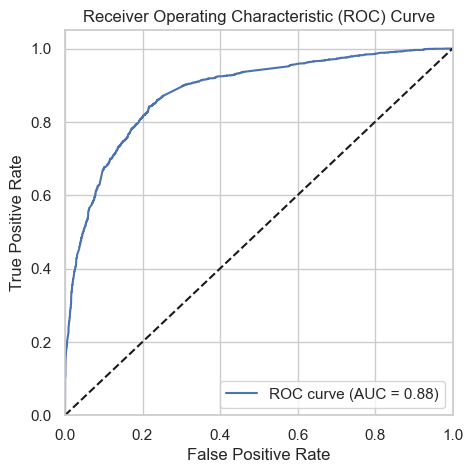

In [129]:
# Drawing the ROC Curve
draw_roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- With an impressive area under the ROC curve of 0.88, our model demonstrates strong performance.

- To find the optimal cutoff point, we aim to identify a probability threshold that balances sensitivity and specificity effectively.

#### 7.4.1 Determining the Ideal Threshold

##### Generating columns with various probability cutoffs

In [130]:
# A function to create binary columns in a DataFrame based on different probability cutoff values.
def create_cutoff_columns(df, cutoff_values):
    for cutoff in cutoff_values:
        df[cutoff] = (df['Converted_prob'] > cutoff).astype(int)
    return df

In [131]:
cutoffs = [x/10 for x in range(10)]
y_train_pred_final = create_cutoff_columns(y_train_pred_final, cutoffs)
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,3009,0,0.212993,0,1,1,1,0,0,0,0,0,0,0
1,1012,0,0.504473,1,1,1,1,1,1,1,0,0,0,0
2,9226,0,0.131652,0,1,1,0,0,0,0,0,0,0,0
3,4750,1,0.906868,1,1,1,1,1,1,1,1,1,1,1
4,7987,1,0.636142,1,1,1,1,1,1,1,1,0,0,0


In [132]:
# Calculate accuracy, sensitivity, and specificity at different probability cutoffs
cutoff_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for cutoff in cutoff_values:
    cm = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[cutoff])
    total = np.sum(cm)
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    cutoff_df.loc[cutoff] = [cutoff, accuracy, sensitivity, specificity]

print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.565895     0.970564     0.312420
0.2          0.2  0.760668     0.907604     0.668630
0.3          0.3  0.804125     0.842600     0.780026
0.4          0.4  0.808692     0.768602     0.833803
0.5          0.5  0.811683     0.699101     0.882202
0.6          0.6  0.797827     0.598937     0.922407
0.7          0.7  0.780350     0.508177     0.950832
0.8          0.8  0.756416     0.413328     0.971319
0.9          0.9  0.715793     0.283729     0.986428


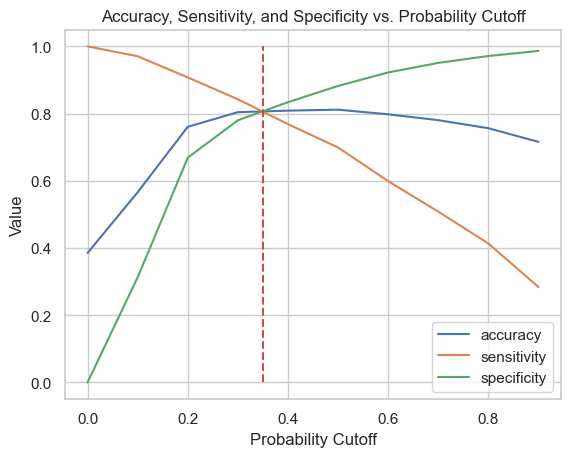

In [133]:
# Visualize the accuracy, sensitivity, and specificity across different probability thresholds.
cutoff_df.plot(x='probability', y=['accuracy', 'sensitivity', 'specificity'], kind='line')
plt.xlabel('Probability Cutoff')
plt.ylabel('Value')
plt.title('Accuracy, Sensitivity, and Specificity vs. Probability Cutoff')
plt.vlines(x=0.35,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

In the graph shown above, the optimal probability cutoff point is at 0.35.

In [134]:
# Assigning Final Predictions
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_prob'].apply(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,3009,0,0.212993,0,1,1,1,0,0,0,0,0,0,0,0
1,1012,0,0.504473,1,1,1,1,1,1,1,0,0,0,0,1
2,9226,0,0.131652,0,1,1,0,0,0,0,0,0,0,0,0
3,4750,1,0.906868,1,1,1,1,1,1,1,1,1,1,1,1
4,7987,1,0.636142,1,1,1,1,1,1,1,1,0,0,0,1


In [135]:
# Assigning Lead Scores to Training Data
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_prob'].apply(lambda x: round(x * 100))
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,3009,0,0.212993,0,1,1,1,0,0,0,0,0,0,0,0,21
1,1012,0,0.504473,1,1,1,1,1,1,1,0,0,0,0,1,50
2,9226,0,0.131652,0,1,1,0,0,0,0,0,0,0,0,0,13
3,4750,1,0.906868,1,1,1,1,1,1,1,1,1,1,1,1,91
4,7987,1,0.636142,1,1,1,1,1,1,1,1,0,0,0,1,64


In [136]:
# Evaluate Overall Accuracy
accuracy = accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
accuracy

0.8060148008187688

In [137]:
# Generating the Confusion matrix
confusion_matrix_result_2 = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print(confusion_matrix_result_2)

[[3141  764]
 [ 468 1978]]


In [138]:
# Generating the clasification report
print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      3905
           1       0.72      0.81      0.76      2446

    accuracy                           0.81      6351
   macro avg       0.80      0.81      0.80      6351
weighted avg       0.81      0.81      0.81      6351



- Accuracy: 0.81 or 81%
- Precision for class 0: 0.87 or 87%
- Recall for class 0: 0.80 or 80%
- Precision for class 1: 0.72 or 72%
- Recall for class 1: 0.81 or 81%

In [139]:
# Calculation other metrics
evaluate_classification_metrics(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

Accuracy: 0.8060148008187688
Sensitivity (True Positive Rate): 0.8086672117743254
Specificity (True Negative Rate): 0.8043533930857875
False Positive Rate: 0.19564660691421254
Positive Predictive Value (Precision): 0.7213712618526623
Negative Predictive Value: 0.8703241895261845


**1. Accuracy:** The model's overall correctness in its predictions, which is approximately 80.60%.

**2. Sensitivity (True Positive Rate):** The proportion of actual positive cases correctly identified by the model, which is about 80.87%. This indicates the model's ability to detect positive cases.

**3. Specificity (True Negative Rate):** The proportion of actual negative cases correctly identified by the model, which is approximately 80.44%. This shows the model's capacity to correctly identify negative cases.

**4. False Positive Rate:** The proportion of actual negative cases incorrectly classified as positive, which is roughly 19.57%. It represents the model's rate of false alarms.

**5. Positive Predictive Value (Precision):** The percentage of predicted positive cases that are true positives, approximately 72.14%. This measures the accuracy of positive predictions.

**6. Negative Predictive Value:** The percentage of predicted negative cases that are true negatives, which is about 87.03%. This signifies the accuracy of negative predictions.

In [140]:
# Printing the 'Precision' and 'Recall'
precision = precision_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
recall = recall_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.79
Recall: 0.70


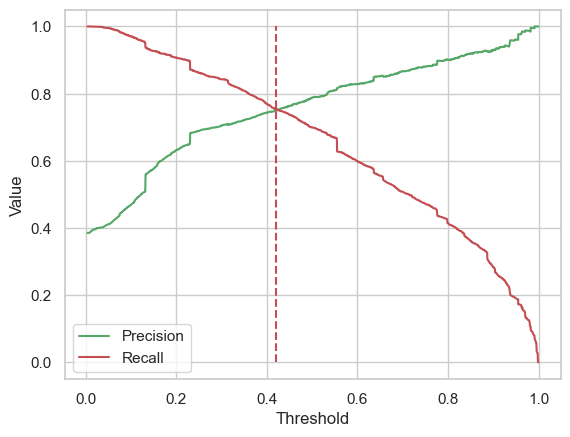

In [141]:
# Creating a Trade-Off Curve Between Precision and Recall
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

plt.plot(thresholds, p[:-1], "g-", label='Precision')
plt.plot(thresholds, r[:-1], "r-", label='Recall')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.vlines(x=0.42,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

0.42 represents the balance between Precision and Recall. Therefore, we can confidently classify any Prospect Lead with a Conversion Probability greater than 42% as a hot Lead.

### Step 8 : Generating predictions for the test dataset.

#### 8.1 Scaling the data

In [142]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [143]:
# Selecting the columns determined by the final model for X_test
X_test = X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,0.100835,0,0,0,0,1,0,0,1,0,0,0
1490,0,0.971741,0,0,0,0,0,1,0,1,0,0,0
7936,0,0.047527,0,0,0,0,1,0,0,1,0,0,0
4216,0,0.000000,0,0,1,0,0,0,0,0,1,0,0
3830,0,0.105331,0,0,0,0,0,0,0,1,0,0,0


In [144]:
# Including a constant term
X_test_sm = sm.add_constant(X_test)

# Generating predictions for the test dataset
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.094438
1490    0.977929
7936    0.079968
4216    0.798113
3830    0.139627
1800    0.654096
6507    0.384650
4821    0.335944
4223    0.954934
4714    0.131652
dtype: float64

In [145]:
# Transforming y_test_pred into a DataFrame from an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [146]:
# Checking the head
y_pred_1.head()

,0
3271,0.094438
1490,0.977929
7936,0.079968
4216,0.798113
3830,0.139627


#### 8.2 Making the final predictions

In [147]:
# Creating the final prediction dataframe
y_pred_final = pd.DataFrame({'Prospect ID': y_test.index, 'Converted': y_test, 'Converted_prob': y_test_pred}).reset_index(drop=True)
y_pred_final = y_pred_final.reindex(columns=['Prospect ID', 'Converted', 'Converted_prob'])

In [148]:
# Checking the head
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.094438
1,1490,1,0.977929
2,7936,0,0.079968
3,4216,1,0.798113
4,3830,0,0.139627


In [149]:
# Assigning the Final Predictions
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.094438,0
1,1490,1,0.977929,1
2,7936,0,0.079968,0
3,4216,1,0.798113,1
4,3830,0,0.139627,0


In [150]:
# Evaluate Overall Accuracy
accuracy = accuracy_score(y_pred_final['Converted'], y_pred_final['final_predicted'])
accuracy

0.7987513771575468

In [151]:
# Generating the Confusion matrix
confusion_matrix_result_3 = confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print(confusion_matrix_result_3)

[[1392  342]
 [ 206  783]]


In [152]:
# Generating the clasification report
print(classification_report(y_pred_final['Converted'], y_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1734
           1       0.70      0.79      0.74       989

    accuracy                           0.80      2723
   macro avg       0.78      0.80      0.79      2723
weighted avg       0.81      0.80      0.80      2723



- Accuracy: 0.80 or 80%
- Precision for class 0: 0.87 or 87%
- Recall for class 0: 0.80 or 80%
- Precision for class 1: 0.70 or 70%
- Recall for class 1: 0.79 or 79%

In [153]:
# Calculation other metrics
evaluate_classification_metrics(y_pred_final.Converted, y_pred_final.final_predicted)

Accuracy: 0.7987513771575468
Sensitivity (True Positive Rate): 0.7917087967644085
Specificity (True Negative Rate): 0.8027681660899654
False Positive Rate: 0.1972318339100346
Positive Predictive Value (Precision): 0.696
Negative Predictive Value: 0.8710888610763454


**1. Accuracy:** The model's overall accuracy is approximately 79.88%, indicating its ability to make correct predictions.

**2. Sensitivity (True Positive Rate):** About 79.17% of actual positive cases are correctly identified by the model. This shows the model's effectiveness in capturing positive instances.

**3. Specificity (True Negative Rate):** Approximately 80.28% of actual negative cases are accurately identified by the model. This signifies the model's capability to correctly identify negative instances.

**4. False Positive Rate:** The model has a false positive rate of approximately 19.72%, indicating the proportion of actual negatives incorrectly classified as positives.

**5. Positive Predictive Value (Precision):** The model's precision is 69.6%, which means that about 69.6% of predicted positive cases are true positives. This measures the accuracy of positive predictions.

**6. Negative Predictive Value:** Approximately 87.11% of predicted negative cases are true negatives, showcasing the model's accuracy in predicting negative instances.

In [154]:
# Printing the 'Precision' and 'Recall'
precision = precision_score(y_pred_final['Converted'], y_pred_final['final_predicted'])
recall = recall_score(y_pred_final['Converted'], y_pred_final['final_predicted'])

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.70
Recall: 0.79


**Observations :**

**Comparing the values obtained for Train & Test Data set:** (rounded off to 1 decimal point)

**Train Data:**
- Accuracy : 81.0 %
- Sensitivity : 81.0 %
- Specificity : 80.4 %

**Test Data:**
- Accuracy : 80.0 %
- Sensitivity : 80.0 %
- Specificity : 80.2 %

Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well. Based on this model, the company can make calls to get a higher lead conversion rate of 80%.

### 9. Conclusion

#### 9.1 Overview of leads and their lead scores

In [155]:
# Assigning Lead Scores to the Testing Data
y_pred_final['Lead_Score'] = y_pred_final['Converted_prob'].apply(lambda x: round(x * 100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.094438,0,9
1,1490,1,0.977929,1,98
2,7936,0,0.079968,0,8
3,4216,1,0.798113,1,80
4,3830,0,0.139627,0,14


#### 9.2 Identifying High-Quality Leads with a  Lead Score greater than 85

In [156]:
# Selecting high-quality leads with a Lead Score of 85 or higher
hot_leads = y_pred_final[y_pred_final['Lead_Score'] >= 85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.977929,1,98
8,4223,1,0.954934,1,95
16,1946,1,0.868843,1,87
21,2461,1,0.995174,1,100
23,5822,1,0.997826,1,100
25,2684,1,0.997826,1,100
30,2010,1,0.981216,1,98
33,4062,1,0.985909,1,99
35,7696,1,0.934898,1,93
36,9049,1,0.923407,1,92


In [157]:
# Checking the shape
hot_leads.shape

(360, 5)

**Observations :**
There are 360 leads that can be contacted and have a strong likelihood of conversion.

In [158]:
print("The Prospect ID of the customers to be contacted is:")
hot_leads_ids = hot_leads["Prospect ID"].values
hot_leads_table = pd.DataFrame({'Prospect ID': hot_leads_ids})
hot_leads_table

The Prospect ID of the customers to be contacted is:


,Prospect ID
0,1490
1,4223
2,1946
3,2461
4,5822
5,2684
6,2010
7,4062
8,7696
9,9049


#### 9.3 Identifying Key Features from our Final Model:

In [159]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            6.508686
Lead Source_Reference                                   4.233370
Total Time Spent on Website                             3.417487
What is your current occupation_Working Professional    2.648638
Lead Origin_Lead Import                                 1.754495
Lead Source_Olark Chat                                  1.399249
Specialization_Others                                  -0.426853
const                                                  -0.753003
Last Notable Activity_Email Opened                     -1.425355
Last Notable Activity_Page Visited on Website          -1.683992
Do Not Email                                           -1.867923
Last Notable Activity_Email Link Clicked               -1.891884
Last Notable Activity_Modified                         -2.105825
Last Notable Activity_Olark Chat Conversation          -2.730931
dtype: float64

These are the key variables that play a significant role in the conversion rate

### Recommendations for the company/CEO :

- The company should prioritize leads from the sources **"Welingak Websites"** and **"Reference"**, as they are more likely to result in conversions.

- Leads who have spent a significant amount of time on the company's websites should be a primary focus, as their extended engagement indicates a higher conversion potential.

- Targeting working professionals among the leads is advisable, as they tend to have a greater likelihood of conversion.

- Special attention should be given to leads sourced from **"Lead Import"**, as they demonstrate a higher chance of conversion.

- It is recommended to focus efforts on leads sourced through **"Olark Chat"**, as these leads are more likely to convert.

- It is advisable for the company to refrain from contacting leads whose most recent interactions were categorized as **"Email Opened"**, **"Page Visited on Website"**, **"Email Link Clicked"**, **"Modified"**, or **"Olark Chat Conversation"**, as these activities are less likely to result in conversions.